In [2]:
import pandas as pd

#gyroscopic data 20 Hz sampling
gyr = pd.read_parquet('track1/P9/train_0/gyr.parquet')
print(gyr)


                  X          Y          Z             time  day_index
0         20.650000   0.140000  -4.690000  09:53:51.382287          0
1          7.980000   5.250000  -1.960000  09:53:51.422277          0
2          8.260000   4.550000  -0.770000  09:53:51.462237          0
3        -15.540000   6.020000   4.620000  09:53:51.492257          0
4         46.689999  -0.490000  -5.040000  09:53:51.542315          0
...             ...        ...        ...              ...        ...
46964105  -1.540000 -18.620001 -12.460000  23:59:59.795176         43
46964106  18.200001 -10.710000 -23.170000  23:59:59.845210         43
46964107  21.910000  -8.050000 -15.680000  23:59:59.895243         43
46964108   7.700000  -5.880000 -13.440001  23:59:59.945277         43
46964109   8.260000   1.050000 -13.300000  23:59:59.995311         43

[46964110 rows x 5 columns]


In [3]:
#heart rate monitor 5 Hz sampling
hrm = pd.read_parquet('track1/P9/train_0/hrm.parquet')
print(hrm)

          heartRate  rRInterval             time  day_index
0                 0           0  09:53:51.668214          0
1                 0           0  09:53:51.866382          0
2                 0           0  09:53:52.066722          0
3                 0           0  09:53:52.266941          0
4                 0           0  09:53:52.468791          0
...             ...         ...              ...        ...
11740263         90         646  23:59:59.071139         43
11740264         90         646  23:59:59.271788         43
11740265         90         603  23:59:59.471425         43
11740266         90         603  23:59:59.671549         43
11740267         90         603  23:59:59.872476         43

[11740268 rows x 4 columns]


In [4]:
#linear acceleration 20 Hz sampling
linacc = pd.read_parquet('track1/P9/train_0/linacc.parquet')
print(linacc)

                 X         Y         Z             time  day_index
0        -0.763310 -7.087541 -6.920043  09:53:51.262316          0
1         0.142998  0.001726  0.404416  09:53:51.302307          0
2         0.011178 -0.001526  0.062386  09:53:51.342297          0
3         0.158836 -0.212369  0.097775  09:53:51.382287          0
4         0.211178 -0.106877  0.326180  09:53:51.422277          0
...            ...       ...       ...              ...        ...
46964259  1.120282 -0.674908  1.130698  23:59:59.795176         43
46964260  0.069857 -0.779479  0.789413  23:59:59.845210         43
46964261  0.949643  0.232084  1.058061  23:59:59.895243         43
46964262  1.084120  0.329596  1.476984  23:59:59.945277         43
46964263  1.013655 -0.618359  0.737596  23:59:59.995311         43

[46964264 rows x 5 columns]


In [5]:
#step counter total number per minute
step = pd.read_parquet('track1/P9/train_0/step.parquet')
print(step)

      totalSteps  stepsWalking  stepsRunning   distance  calories start_time  \
0             25            15            10  28.410000      1.82   00:15:00   
1             18            15             3  14.840000      0.93   00:25:15   
2             17            17             0  11.330000      0.53   09:51:25   
3             19            19             0  11.830000      0.60   09:54:26   
4             19            19             0  12.720000      0.53   09:57:40   
...          ...           ...           ...        ...       ...        ...   
1442          89            89             0  66.870003      3.03   10:03:06   
1443          22            22             0   9.820000      0.51   10:08:36   
1444          27            27             0  21.450001      0.91   10:08:51   
1445          15            15             0  11.400000      0.52   21:14:59   
1446          14            14             0   8.480000      0.37   23:14:59   

      end_time  start_date_index  end_d

In [6]:
#sleep data
sleep = pd.read_parquet('track1/P9/train_0/sleep.parquet')
print(sleep)

         start_time         end_time  start_date_index  end_date_index
0   00:05:54.481874  08:36:39.957535                -1              -1
1   10:48:41.886506  11:30:26.684833                -1              -1
2   13:33:34.284493  13:46:34.816514                 0               0
3   15:03:37.950247  15:16:38.480504                 0               0
4   23:09:57.733254  02:54:06.889927                 0               1
..              ...              ...               ...             ...
76  09:45:30.365790  10:29:32.167555                42              42
77  01:03:07.707310  03:43:14.255548                43              43
78  04:53:17.106512  09:56:29.495055                43              43
79  18:58:39.717298  20:57:44.582522                43              43
80  00:54:54.236233  09:11:14.508742                44              44

[81 rows x 4 columns]


In [7]:
import pandas as pd
import os
from collections import defaultdict

# Store results
patient_results = {}
total_relapse = 0
total_non_relapse = 0

# Iterate through each patient
for patient in [f'P{i}' for i in range(1, 10)]:
    patient_path = f'./track1/{patient}'
    
    if not os.path.exists(patient_path):
        print(f"{patient}: Not found")
        continue
    
    # Get all splits for this patient
    splits = sorted([d for d in os.listdir(patient_path) if not d.startswith('.')])
    
    patient_relapse = 0
    patient_non_relapse = 0
    split_details = []
    
    for split in splits:
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if os.path.exists(relapse_file):
            # Read the CSV
            df = pd.read_csv(relapse_file)
            
            # Count relapses
            if 'relapse' in df.columns:
                n_relapse = (df['relapse'] == 1).sum()
                n_non_relapse = (df['relapse'] == 0).sum()
            else:
                # If only day_index column, assume all are non-relapse
                n_relapse = 0
                n_non_relapse = len(df)
            
            patient_relapse += n_relapse
            patient_non_relapse += n_non_relapse
            
            split_details.append({
                'split': split,
                'relapse': n_relapse,
                'non_relapse': n_non_relapse,
                'total': n_relapse + n_non_relapse
            })
    
    # Store patient results
    patient_results[patient] = {
        'relapse': patient_relapse,
        'non_relapse': patient_non_relapse,
        'total': patient_relapse + patient_non_relapse,
        'splits': split_details
    }
    
    total_relapse += patient_relapse
    total_non_relapse += patient_non_relapse
    
    # Print patient summary
    print(f"\n{'='*70}")
    print(f"{patient}")
    print(f"{'='*70}")
    
    for detail in split_details:
        print(f"  {detail['split']:12s}: Relapse={detail['relapse']:3d}, Non-relapse={detail['non_relapse']:3d}, Total={detail['total']:3d}")
    
    patient_total = patient_relapse + patient_non_relapse
    relapse_pct = (patient_relapse / patient_total * 100) if patient_total > 0 else 0
    
    print(f"  {'-'*66}")
    print(f"  {'PATIENT TOTAL':12s}: Relapse={patient_relapse:3d}, Non-relapse={patient_non_relapse:3d}, Total={patient_total:3d} ({relapse_pct:.1f}% relapse)")

# Print overall summary
print(f"\n{'='*70}")
print(f"OVERALL SUMMARY - ALL 9 PATIENTS")
print(f"{'='*70}")

grand_total = total_relapse + total_non_relapse
overall_relapse_pct = (total_relapse / grand_total * 100) if grand_total > 0 else 0

print(f"Total Relapse Days:     {total_relapse:4d}")
print(f"Total Non-Relapse Days: {total_non_relapse:4d}")
print(f"Total Days:             {grand_total:4d}")
print(f"Relapse Percentage:     {overall_relapse_pct:.2f}%")
print(f"{'='*70}")


P1
  test_0      : Relapse= 17, Non-relapse= 15, Total= 32
  test_1      : Relapse=  0, Non-relapse= 33, Total= 33
  test_2      : Relapse=  8, Non-relapse=  0, Total=  8
  train_0     : Relapse=  0, Non-relapse= 95, Total= 95
  train_1     : Relapse=  0, Non-relapse= 77, Total= 77
  val_0       : Relapse=  0, Non-relapse= 33, Total= 33
  val_1       : Relapse= 29, Non-relapse=  0, Total= 29
  ------------------------------------------------------------------
  PATIENT TOTAL: Relapse= 54, Non-relapse=253, Total=307 (17.6% relapse)

P2
  test_0      : Relapse= 38, Non-relapse= 30, Total= 68
  test_1      : Relapse=  0, Non-relapse= 43, Total= 43
  train_0     : Relapse=  0, Non-relapse= 86, Total= 86
  train_1     : Relapse=  0, Non-relapse= 60, Total= 60
  train_2     : Relapse=  0, Non-relapse= 65, Total= 65
  val_0       : Relapse= 44, Non-relapse= 25, Total= 69
  val_1       : Relapse=  0, Non-relapse= 41, Total= 41
  ----------------------------------------------------------------

In [8]:
# =============================================================================
# SLEEP FEATURE ENGINEERING
# =============================================================================
# Strategy:
# 1. Main sleep = longest sleep episode per day
# 2. Naps = all other sleep episodes
# 3. Baseline = average metrics from non-relapse days in train+val splits (per patient)
# 4. Deviation features = daily values compared to patient's personal baseline

import pandas as pd
import numpy as np
import os

# -----------------------------------------------------------------------------
# Helper Functions
# -----------------------------------------------------------------------------

def time_to_hours(time_str):
    """
    Convert HH:MM:SS.ffffff to decimal hours.
    
    Args:
        time_str: Time string in format 'HH:MM:SS.ffffff'
    
    Returns:
        float: Decimal hours (e.g., 22.5 for 10:30 PM)
    """
    try:
        t = pd.to_datetime(time_str, format='%H:%M:%S.%f')
        return t.hour + t.minute / 60 + t.second / 3600
    except:
        return np.nan


def calculate_duration(row):
    """
    Calculate sleep duration in hours, handling overnight episodes.
    
    Args:
        row: DataFrame row with start_time, end_time, start_date_index, end_date_index
    
    Returns:
        float: Duration in hours
    """
    start_h = time_to_hours(row['start_time'])
    end_h = time_to_hours(row['end_time'])
    
    if pd.isna(start_h) or pd.isna(end_h):
        return np.nan
    
    if row['end_date_index'] > row['start_date_index']:
        # Overnight sleep: crosses midnight
        return (24 - start_h) + end_h
    else:
        # Same day sleep
        return end_h - start_h


def circular_time_diff(current_hour, baseline_hour):
    """
    Calculate difference in hours, handling midnight wrap-around.
    Positive = later than baseline, Negative = earlier than baseline.
    
    Args:
        current_hour: Current sleep onset time (0-24)
        baseline_hour: Baseline sleep onset time (0-24)
    
    Returns:
        float: Difference in hours (-12 to +12)
    """
    if pd.isna(current_hour) or pd.isna(baseline_hour):
        return np.nan
    
    diff = current_hour - baseline_hour
    
    # Handle wrap-around
    if diff > 12:
        diff = diff - 24
    elif diff < -12:
        diff = diff + 24
    
    return diff


def circular_mean_hours(hours_series):
    """
    Calculate circular mean for hours (0-24 scale).
    Handles wrap-around at midnight correctly.
    
    Example: average of 22 (10pm) and 2 (2am) = ~0 (midnight), not 12 (noon)
    
    Args:
        hours_series: Series of hour values (0-24)
    
    Returns:
        float: Circular mean in hours (0-24)
    """
    # Remove NaN values
    hours = hours_series.dropna()
    
    if len(hours) == 0:
        return np.nan
    
    # Convert to radians (24 hours = 2π)
    radians = hours * (2 * np.pi / 24)
    
    # Calculate mean of sin and cos components
    sin_mean = np.sin(radians).mean()
    cos_mean = np.cos(radians).mean()
    
    # Convert back to hours
    mean_radians = np.arctan2(sin_mean, cos_mean)
    mean_hours = mean_radians * (24 / (2 * np.pi))
    
    # Ensure positive (0-24 range)
    if mean_hours < 0:
        mean_hours += 24
    
    return mean_hours


def circular_std_hours(hours_series):
    """
    Calculate circular standard deviation for hours.
    
    Args:
        hours_series: Series of hour values (0-24)
    
    Returns:
        float: Circular standard deviation in hours
    """
    hours = hours_series.dropna()
    
    if len(hours) == 0:
        return np.nan
    
    # Convert to radians
    radians = hours * (2 * np.pi / 24)
    
    # Calculate R (mean resultant length)
    sin_mean = np.sin(radians).mean()
    cos_mean = np.cos(radians).mean()
    R = np.sqrt(sin_mean**2 + cos_mean**2)
    
    # Circular standard deviation
    if R >= 1:
        return 0
    
    circular_std_radians = np.sqrt(-2 * np.log(R))
    circular_std_hours = circular_std_radians * (24 / (2 * np.pi))
    
    return circular_std_hours


# -----------------------------------------------------------------------------
# Sleep Data Processing
# -----------------------------------------------------------------------------

def process_sleep_episodes(sleep_df):
    """
    Process raw sleep data: add duration, timing, and assign to days.
    
    Args:
        sleep_df: DataFrame from sleep.parquet
    
    Returns:
        DataFrame with added columns: duration_hours, start_hour, end_hour, assigned_day
    """
    df = sleep_df.copy()
    
    # Filter out pre-study days (day_index = -1)
    df = df[df['end_date_index'] >= 0]
    
    if len(df) == 0:
        return df
    
    # Calculate duration and timing for each episode
    df['duration_hours'] = df.apply(calculate_duration, axis=1)
    df['start_hour'] = df['start_time'].apply(time_to_hours)
    df['end_hour'] = df['end_time'].apply(time_to_hours)
    
    # Assign each episode to a day:
    # - Overnight sleep (starts after 6pm or before 6am) → attribute to wake-up day
    # - Daytime sleep → attribute to same day
    df['assigned_day'] = df.apply(
        lambda r: r['end_date_index'] if (r['start_hour'] >= 18 or r['start_hour'] < 6) 
        else r['start_date_index'], 
        axis=1
    )
    
    return df


def extract_daily_sleep_features(sleep_df, all_day_indices):
    """
    Extract daily sleep features from processed sleep episodes.
    Main sleep = longest OVERNIGHT episode per day (starts between 6PM-6AM).
    If no overnight sleep, falls back to longest episode overall.
    
    Args:
        sleep_df: Processed sleep DataFrame with assigned_day
        all_day_indices: List of all day indices to include
    
    Returns:
        DataFrame with daily features
    """
    daily_features = []
    
    for day in all_day_indices:
        day_episodes = sleep_df[sleep_df['assigned_day'] == day]
        
        if len(day_episodes) == 0:
            # No sleep data for this day
            features = {
                'day_index': day,
                'main_sleep_hours': np.nan,
                'main_sleep_onset': np.nan,
                'main_sleep_wake': np.nan,
                'total_sleep_hours': 0,
                'num_naps': 0,
                'nap_hours': 0,
                'num_sleep_episodes': 0,
            }
        else:
            # First, try to find overnight episodes (started 6PM-6AM)
            overnight_episodes = day_episodes[
                (day_episodes['start_hour'] >= 18) | (day_episodes['start_hour'] < 6)
            ]
            
            if len(overnight_episodes) > 0:
                # Main sleep = longest overnight episode
                main_idx = overnight_episodes['duration_hours'].idxmax()
            else:
                # Fallback: longest episode overall (unusual schedule)
                main_idx = day_episodes['duration_hours'].idxmax()
            
            main_episode = day_episodes.loc[main_idx]
            
            # Naps = everything except main sleep
            naps = day_episodes.drop(main_idx)
            
            features = {
                'day_index': day,
                'main_sleep_hours': main_episode['duration_hours'],
                'main_sleep_onset': main_episode['start_hour'],
                'main_sleep_wake': main_episode['end_hour'],
                'total_sleep_hours': day_episodes['duration_hours'].sum(),
                'num_naps': len(naps),
                'nap_hours': naps['duration_hours'].sum() if len(naps) > 0 else 0,
                'num_sleep_episodes': len(day_episodes),
            }
        
        daily_features.append(features)
    
    return pd.DataFrame(daily_features)


# -----------------------------------------------------------------------------
# Baseline Calculation (Per Patient)
# -----------------------------------------------------------------------------

def calculate_patient_baseline(daily_features_list):
    """
    Calculate baseline metrics from non-relapse days (combined from multiple splits).
    
    Args:
        daily_features_list: List of DataFrames with daily features and 'relapse' column
    
    Returns:
        dict: Baseline metrics for this patient
    """
    # Combine all splits
    all_features = pd.concat(daily_features_list, ignore_index=True)
    
    # Filter to non-relapse days with valid main sleep data
    baseline_days = all_features[
        (all_features['relapse'] == 0) & 
        (all_features['main_sleep_hours'].notna())
    ]
    
    if len(baseline_days) == 0:
        # No valid baseline data
        return {
            'baseline_main_sleep_hours': np.nan,
            'baseline_main_sleep_hours_std': np.nan,
            'baseline_main_sleep_onset': np.nan,
            'baseline_main_sleep_onset_std': np.nan,
            'baseline_total_sleep_hours': np.nan,
            'baseline_total_sleep_hours_std': np.nan,
            'baseline_num_naps': np.nan,
            'baseline_num_naps_std': np.nan,
            'baseline_nap_hours': np.nan,
            'baseline_num_sleep_episodes': np.nan,
            'baseline_num_sleep_episodes_std': np.nan,
            'n_baseline_days': 0,
        }
    
    baseline = {
        'baseline_main_sleep_hours': baseline_days['main_sleep_hours'].mean(),
        'baseline_main_sleep_hours_std': baseline_days['main_sleep_hours'].std(),
        # Use CIRCULAR mean for sleep onset time (handles midnight wrap-around)
        'baseline_main_sleep_onset': circular_mean_hours(baseline_days['main_sleep_onset']),
        'baseline_main_sleep_onset_std': circular_std_hours(baseline_days['main_sleep_onset']),
        'baseline_total_sleep_hours': baseline_days['total_sleep_hours'].mean(),
        'baseline_total_sleep_hours_std': baseline_days['total_sleep_hours'].std(),
        'baseline_num_naps': baseline_days['num_naps'].mean(),
        'baseline_num_naps_std': baseline_days['num_naps'].std(),
        'baseline_nap_hours': baseline_days['nap_hours'].mean(),
        # Add num_sleep_episodes baseline (this is the most predictive feature!)
        'baseline_num_sleep_episodes': baseline_days['num_sleep_episodes'].mean(),
        'baseline_num_sleep_episodes_std': baseline_days['num_sleep_episodes'].std(),
        'n_baseline_days': len(baseline_days),
    }
    
    return baseline


def add_deviation_features(daily_features_df, baseline):
    """
    Add deviation from baseline features to daily data.
    
    Args:
        daily_features_df: DataFrame with daily sleep features
        baseline: dict with baseline metrics
    
    Returns:
        DataFrame with added deviation columns
    """
    df = daily_features_df.copy()
    
    # Absolute differences
    df['main_sleep_hours_diff'] = df['main_sleep_hours'] - baseline['baseline_main_sleep_hours']
    df['total_sleep_hours_diff'] = df['total_sleep_hours'] - baseline['baseline_total_sleep_hours']
    df['num_naps_diff'] = df['num_naps'] - baseline['baseline_num_naps']
    df['nap_hours_diff'] = df['nap_hours'] - baseline['baseline_nap_hours']
    
    # Add num_sleep_episodes deviation (most predictive feature!)
    df['num_sleep_episodes_diff'] = df['num_sleep_episodes'] - baseline['baseline_num_sleep_episodes']
    
    # Sleep onset difference (handling circular time)
    df['main_sleep_onset_diff'] = df['main_sleep_onset'].apply(
        lambda x: circular_time_diff(x, baseline['baseline_main_sleep_onset'])
    )
    
    # Z-scores (normalized by patient's variability)
    if baseline['baseline_main_sleep_hours_std'] and baseline['baseline_main_sleep_hours_std'] > 0:
        df['main_sleep_hours_zscore'] = df['main_sleep_hours_diff'] / baseline['baseline_main_sleep_hours_std']
    else:
        df['main_sleep_hours_zscore'] = 0
    
    if baseline['baseline_main_sleep_onset_std'] and baseline['baseline_main_sleep_onset_std'] > 0:
        df['main_sleep_onset_zscore'] = df['main_sleep_onset_diff'] / baseline['baseline_main_sleep_onset_std']
    else:
        df['main_sleep_onset_zscore'] = 0
    
    if baseline['baseline_total_sleep_hours_std'] and baseline['baseline_total_sleep_hours_std'] > 0:
        df['total_sleep_hours_zscore'] = df['total_sleep_hours_diff'] / baseline['baseline_total_sleep_hours_std']
    else:
        df['total_sleep_hours_zscore'] = 0
    
    # Add num_sleep_episodes z-score (MOST PREDICTIVE FEATURE!)
    if baseline['baseline_num_sleep_episodes_std'] and baseline['baseline_num_sleep_episodes_std'] > 0:
        df['num_sleep_episodes_zscore'] = df['num_sleep_episodes_diff'] / baseline['baseline_num_sleep_episodes_std']
    else:
        df['num_sleep_episodes_zscore'] = 0
    
    return df


# -----------------------------------------------------------------------------
# Main Processing Pipeline
# -----------------------------------------------------------------------------

def process_patient_sleep_data(patient_id, base_path='track1'):
    """
    Process all sleep data for a single patient.
    
    Args:
        patient_id: Patient ID (e.g., 'P1')
        base_path: Path to data directory
    
    Returns:
        tuple: (all_daily_features DataFrame, baseline dict)
    """
    patient_path = f'{base_path}/{patient_id}'
    
    # Get all available splits
    splits = sorted([d for d in os.listdir(patient_path) if not d.startswith('.')])
    
    # Separate train+val (for baseline) and test splits
    train_val_splits = [s for s in splits if s.startswith('train') or s.startswith('val')]
    all_splits = splits
    
    # First pass: collect all train+val data for baseline calculation
    baseline_data = []
    
    for split in train_val_splits:
        sleep_file = f'{patient_path}/{split}/sleep.parquet'
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if not os.path.exists(sleep_file) or not os.path.exists(relapse_file):
            continue
        
        # Load data
        sleep_df = pd.read_parquet(sleep_file)
        relapses_df = pd.read_csv(relapse_file)
        
        # Process sleep episodes
        processed_sleep = process_sleep_episodes(sleep_df)
        
        if len(processed_sleep) == 0:
            continue
        
        # Get day indices from relapses file
        day_indices = relapses_df['day_index'].tolist()
        
        # Extract daily features
        daily_features = extract_daily_sleep_features(processed_sleep, day_indices)
        
        # Add relapse labels
        daily_features = daily_features.merge(relapses_df, on='day_index', how='left')
        daily_features['split'] = split
        
        baseline_data.append(daily_features)
    
    # Calculate patient baseline from non-relapse train+val days
    if baseline_data:
        baseline = calculate_patient_baseline(baseline_data)
    else:
        baseline = calculate_patient_baseline([])  # Empty baseline
    
    # Second pass: process ALL splits and add deviation features
    all_daily_features = []
    
    for split in all_splits:
        sleep_file = f'{patient_path}/{split}/sleep.parquet'
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if not os.path.exists(sleep_file) or not os.path.exists(relapse_file):
            continue
        
        # Load data
        sleep_df = pd.read_parquet(sleep_file)
        relapses_df = pd.read_csv(relapse_file)
        
        # Process sleep episodes
        processed_sleep = process_sleep_episodes(sleep_df)
        
        # Get day indices from relapses file
        day_indices = relapses_df['day_index'].tolist()
        
        # Extract daily features
        daily_features = extract_daily_sleep_features(processed_sleep, day_indices)
        
        # Add deviation features using patient-specific baseline
        daily_features = add_deviation_features(daily_features, baseline)
        
        # Add relapse labels and metadata
        daily_features = daily_features.merge(relapses_df, on='day_index', how='left')
        daily_features['patient_id'] = patient_id
        daily_features['split'] = split
        daily_features['split_type'] = split.split('_')[0]  # train, val, or test
        
        all_daily_features.append(daily_features)
    
    # Combine all splits
    if all_daily_features:
        combined = pd.concat(all_daily_features, ignore_index=True)
    else:
        combined = pd.DataFrame()
    
    return combined, baseline


# =============================================================================
# PROCESS ALL PATIENTS
# =============================================================================

print("Processing sleep data for all patients...")
print("=" * 70)

all_patient_data = []
patient_baselines = {}

for patient_id in [f'P{i}' for i in range(1, 10)]:
    print(f"\nProcessing {patient_id}...")
    
    patient_data, baseline = process_patient_sleep_data(patient_id)
    
    if len(patient_data) > 0:
        all_patient_data.append(patient_data)
        patient_baselines[patient_id] = baseline
        
        # Print baseline summary
        print(f"  Baseline days: {baseline['n_baseline_days']}")
        print(f"  Avg main sleep: {baseline['baseline_main_sleep_hours']:.2f} hrs (std: {baseline['baseline_main_sleep_hours_std']:.2f})")
        print(f"  Avg sleep onset: {baseline['baseline_main_sleep_onset']:.2f} hrs")
        print(f"  Avg num naps: {baseline['baseline_num_naps']:.2f}")
        print(f"  Days processed: {len(patient_data)}")
    else:
        print(f"  No data found")

# Combine all patients
sleep_features_df = pd.concat(all_patient_data, ignore_index=True)

print("\n" + "=" * 70)
print("SLEEP FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(sleep_features_df)}")
print(f"Patients: {sleep_features_df['patient_id'].nunique()}")
print(f"\nSplit distribution:")
print(sleep_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(sleep_features_df['relapse'].value_counts())
print(f"\nFeature columns:")
print(sleep_features_df.columns.tolist())

from scipy import stats

# =============================================================================
# SLEEP METRICS: RELAPSE VS NON-RELAPSE (PER PATIENT + OVERALL)
# =============================================================================

def compute_sleep_pvalues(df, feature_cols):
    """
    Compare relapse vs non-relapse days for each sleep feature.

    Args:
        df (pd.DataFrame): Sleep features with relapse labels.
        feature_cols (list[str]): Numeric feature columns to compare.

    Returns:
        pd.DataFrame: Summary stats and Welch's t-test p-values.
    """
    results = []

    for feat in feature_cols:
        relapse_vals = df[df['relapse'] == 1][feat].dropna()
        non_relapse_vals = df[df['relapse'] == 0][feat].dropna()

        n_rel = len(relapse_vals)
        n_non = len(non_relapse_vals)
        relapse_mean = relapse_vals.mean() if n_rel > 0 else np.nan
        non_relapse_mean = non_relapse_vals.mean() if n_non > 0 else np.nan
        diff = relapse_mean - non_relapse_mean if n_rel > 0 and n_non > 0 else np.nan

        if n_rel >= 2 and n_non >= 2:
            t_stat, p_val = stats.ttest_ind(
                relapse_vals,
                non_relapse_vals,
                equal_var=False,
                nan_policy='omit'
            )
        else:
            p_val = np.nan

        results.append({
            'feature': feat,
            'relapse_mean': relapse_mean,
            'non_relapse_mean': non_relapse_mean,
            'diff': diff,
            'p_value': p_val,
            'n_relapse': n_rel,
            'n_non_relapse': n_non
        })

    return pd.DataFrame(results)


def format_results_table(results_df):
    """
    Format and sort the results table for display.

    Args:
        results_df (pd.DataFrame): Results from compute_sleep_pvalues.

    Returns:
        pd.DataFrame: Sorted results with p-values first.
    """
    return results_df.sort_values('p_value')


def fmt(x):
    """
    Format numeric values for display.

    Args:
        x (float): Value to format.

    Returns:
        str: Formatted value.
    """
    return "nan" if pd.isna(x) else f"{x:.4f}"


# Identify numeric sleep features to test
numeric_cols = sleep_features_df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = {'relapse', 'day_index'}
feature_cols = [
    c for c in numeric_cols
    if c not in exclude_cols and not c.endswith('_index')
]

print("\n" + "=" * 70)
print("SLEEP METRICS: RELAPSE VS NON-RELAPSE (PER PATIENT)")
print("=" * 70)

per_patient_results = []

for patient in sorted(sleep_features_df['patient_id'].unique()):
    patient_df = sleep_features_df[sleep_features_df['patient_id'] == patient]
    results_df = compute_sleep_pvalues(patient_df, feature_cols)
    formatted = format_results_table(results_df)

    results_df['patient_id'] = patient
    per_patient_results.append(results_df)

    print(f"\nPatient {patient}")
    if len(formatted) == 0:
        print("  No data")
        continue

    print(
        formatted.to_string(
            index=False,
            formatters={
                'relapse_mean': fmt,
                'non_relapse_mean': fmt,
                'diff': fmt,
                'p_value': fmt
            }
        )
    )

print("\n" + "=" * 70)
print("SLEEP METRICS: RELAPSE VS NON-RELAPSE (OVERALL)")
print("=" * 70)

overall_results = compute_sleep_pvalues(sleep_features_df, feature_cols)
formatted_overall = format_results_table(overall_results)

print(
    formatted_overall.to_string(
        index=False,
        formatters={
            'relapse_mean': fmt,
            'non_relapse_mean': fmt,
            'diff': fmt,
            'p_value': fmt
        }
    )
)

# =============================================================================
# SUMMARY: CONSISTENCY ACROSS PATIENTS
# =============================================================================

if per_patient_results:
    per_patient_df = pd.concat(per_patient_results, ignore_index=True)
    per_patient_df = per_patient_df.dropna(subset=['p_value'])

    sig_df = per_patient_df[per_patient_df['p_value'] < 0.05].copy()
    if len(sig_df) == 0:
        print("\nNo features significant at p < 0.05 for any patient.")
    else:
        sig_df['direction'] = sig_df['diff'].apply(lambda x: 'higher_in_relapse' if x > 0 else 'lower_in_relapse')

        summary = (
            sig_df.groupby('feature')
            .agg(
                patients_sig=('patient_id', 'nunique'),
                direction_counts=('direction', lambda s: s.value_counts().to_dict())
            )
            .reset_index()
            .sort_values(['patients_sig', 'feature'], ascending=[False, True])
        )

        print("\n" + "=" * 70)
        print("SUMMARY: FEATURES SIGNIFICANT IN >=1 PATIENT (p < 0.05)")
        print("=" * 70)
        print(summary.to_string(index=False))

        top_consistent = summary[summary['patients_sig'] >= 2]
        print("\n" + "=" * 70)
        print("SUMMARY: FEATURES SIGNIFICANT IN >=2 PATIENTS")
        print("=" * 70)
        if len(top_consistent) > 0:
            print(top_consistent.to_string(index=False))
        else:
            print("None")


Processing sleep data for all patients...

Processing P1...
  Baseline days: 139
  Avg main sleep: 6.04 hrs (std: 3.25)
  Avg sleep onset: 23.06 hrs
  Avg num naps: 0.70
  Days processed: 307

Processing P2...
  Baseline days: 172
  Avg main sleep: 5.46 hrs (std: 4.79)
  Avg sleep onset: 21.27 hrs
  Avg num naps: 0.74
  Days processed: 432

Processing P3...
  Baseline days: 202
  Avg main sleep: 5.94 hrs (std: 2.90)
  Avg sleep onset: 0.57 hrs
  Avg num naps: 0.33
  Days processed: 414

Processing P4...
  Baseline days: 220
  Avg main sleep: 5.08 hrs (std: 3.19)
  Avg sleep onset: 2.65 hrs
  Avg num naps: 1.15
  Days processed: 374

Processing P5...
  Baseline days: 247
  Avg main sleep: 6.63 hrs (std: 1.71)
  Avg sleep onset: 23.94 hrs
  Avg num naps: 1.09
  Days processed: 406

Processing P6...
  Baseline days: 151
  Avg main sleep: 6.92 hrs (std: 3.84)
  Avg sleep onset: 0.40 hrs
  Avg num naps: 0.42
  Days processed: 397

Processing P7...
  Baseline days: 178
  Avg main sleep: 9.58

In [9]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION USING 16 SLEEP FEATURES
# =============================================================================
# Using sleep features with patient-specific baseline deviations

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, 
    classification_report, confusion_matrix,
    precision_recall_curve, roc_curve
)
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

# Define feature columns
feature_cols = [
    # Raw daily metrics
    'main_sleep_hours',
    'main_sleep_onset', 
    'total_sleep_hours',
    'num_naps',
    'nap_hours',
    'num_sleep_episodes',
    
    # Deviation from personal baseline (KEY FEATURES)
    'main_sleep_hours_diff',
    'main_sleep_onset_diff',
    'total_sleep_hours_diff',
    'num_naps_diff',
    'nap_hours_diff',
    'num_sleep_episodes_diff',  # ADDED: Most predictive feature!
    
    # Normalized deviations (z-scores)
    'main_sleep_hours_zscore',
    'main_sleep_onset_zscore',
    'total_sleep_hours_zscore',
    'num_sleep_episodes_zscore',  # ADDED: Most predictive feature!
]

# =============================================================================
# IMPORTANT: Distribution shift problem!
# Train splits have 0% relapses, Val has 33%, Test has 42%
# 
# Option A: Use only VAL for training (has relapses, similar distribution to test)
# Option B: Use VAL for training, TRAIN for baseline calculation only
# =============================================================================

# Using ONLY val data for training (it has relapse examples)
# Train splits are used for baseline calculation but NOT for model training
train_data = sleep_features_df[sleep_features_df['split_type'] == 'val'].copy()
test_data = sleep_features_df[sleep_features_df['split_type'] == 'test'].copy()

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")

print("Data split:")
print(f"  Training (train+val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

print("\nRelapse distribution in training:")
print(train_data['relapse'].value_counts())

print("\nRelapse distribution in test:")
print(test_data['relapse'].value_counts())

# Prepare features and labels
X_train = train_data[feature_cols].copy()
y_train = train_data['relapse'].copy()

X_test = test_data[feature_cols].copy()
y_test = test_data['relapse'].copy()

# Handle missing values (fill with 0 for now - could use more sophisticated imputation)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Handle any remaining NaN in labels
y_train = y_train.fillna(0).astype(int)
y_test = y_test.fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# Train XGBoost Model
# -----------------------------------------------------------------------------

# Calculate class weight for imbalanced data
n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

print(f"\nClass balance:")
print(f"  Negative (no relapse): {n_neg}")
print(f"  Positive (relapse): {n_pos}")
print(f"  Scale pos weight: {scale_pos_weight:.2f}")

# Initialize and train model
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model...")
model.fit(X_train, y_train)
print("Training complete!")

# -----------------------------------------------------------------------------
# Evaluate Model
# -----------------------------------------------------------------------------

# Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

# Random baseline for PR-AUC (equals positive class proportion)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 797 days
  Test: 827 days

Relapse distribution in training:
relapse
0    536
1    261
Name: count, dtype: int64

Relapse distribution in test:
relapse
0    479
1    348
Name: count, dtype: int64

Feature matrix shapes:
  X_train: (797, 16)
  X_test: (827, 16)

Class balance:
  Negative (no relapse): 536
  Positive (relapse): 261
  Scale pos weight: 2.05

Training XGBoost model...
Training complete!

MODEL EVALUATION RESULTS

ROC-AUC: 0.5350  (random baseline: 0.5)
PR-AUC:  0.4395  (random baseline: 0.4208)
PR-AUC improvement over random: 4.4%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.60      0.64      0.62       479
     Relapse       0.45      0.42      0.43       348

    accuracy                           0.54       827
   macro avg       0.53      0.53      0.53       827
weighted avg       0.54      0.54      0.54  

Feature Importance (top features):
                  feature  importance
           nap_hours_diff    0.126614
  main_sleep_onset_zscore    0.091985
    main_sleep_onset_diff    0.076549
         main_sleep_hours    0.074457
 total_sleep_hours_zscore    0.072422
num_sleep_episodes_zscore    0.072097
  main_sleep_hours_zscore    0.071819
         main_sleep_onset    0.069416
                nap_hours    0.069260
    main_sleep_hours_diff    0.068397
   total_sleep_hours_diff    0.067599
            num_naps_diff    0.058908
        total_sleep_hours    0.044872
                 num_naps    0.026241
  num_sleep_episodes_diff    0.009363
       num_sleep_episodes    0.000000


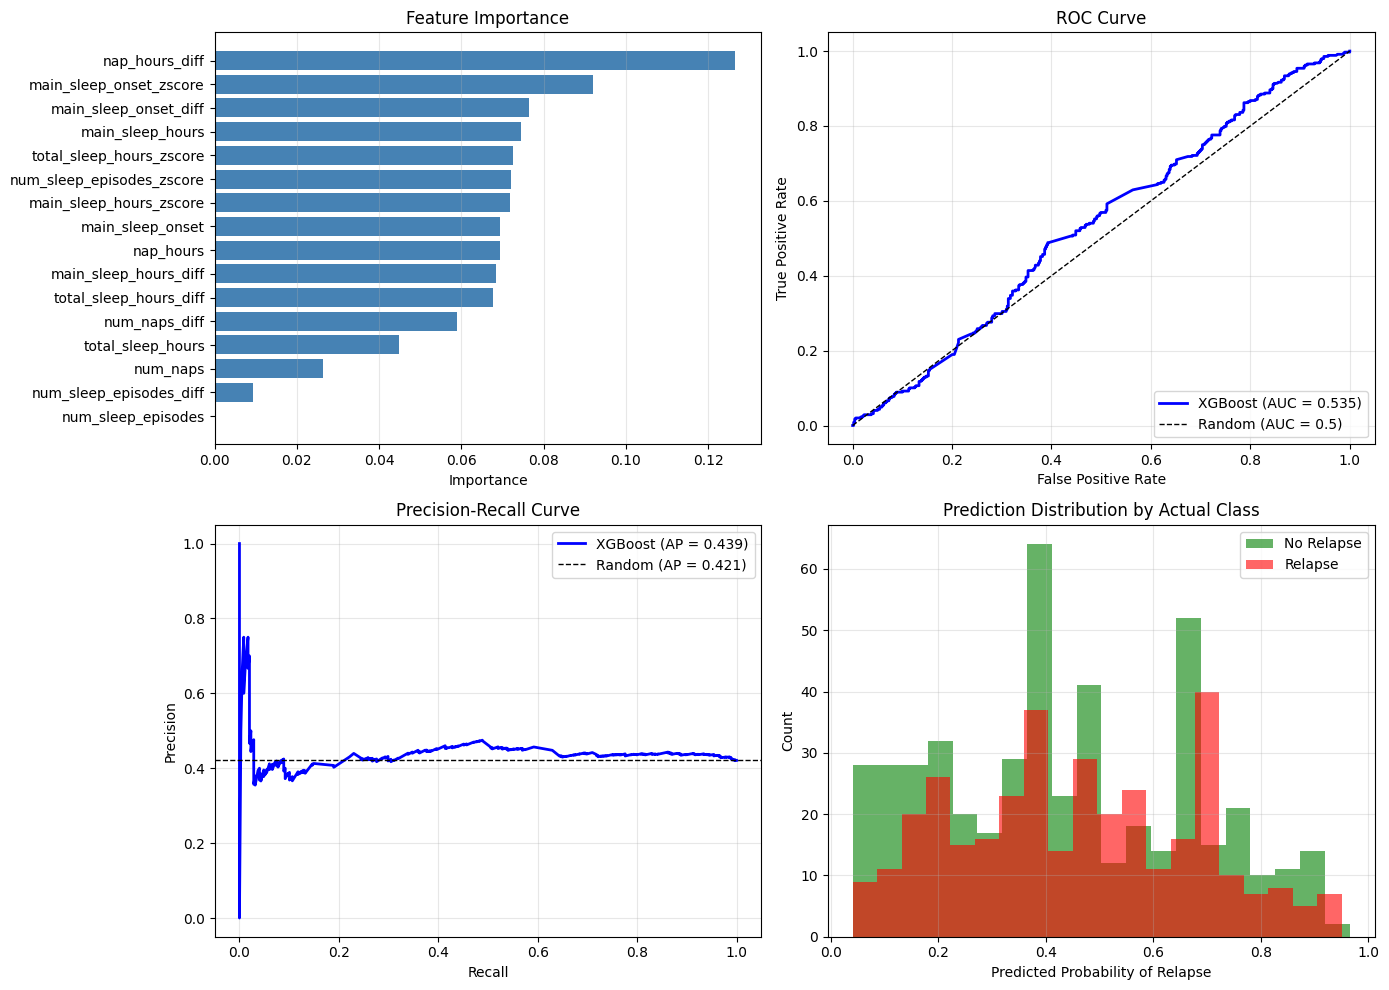


INTERPRETATION

Key findings from feature importance:
- Higher importance = more useful for predicting relapse
- Deviation features (diff, zscore) capture changes from patient's baseline
- Raw features capture absolute sleep patterns

Next steps to improve:
1. Add more sensor features (HR, activity, steps)
2. Add temporal features (rolling averages, trends)
3. Tune hyperparameters
4. Try other models (Random Forest, LightGBM)



In [10]:
# =============================================================================
# AVERAGE SLEEP FEATURE IMPORTANCE & VISUALIZATION (not patient specific but overall)
# =============================================================================

# Feature importance
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (top features):")
print(importance_df.to_string(index=False))

# -----------------------------------------------------------------------------
# Plots
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance Bar Chart
ax1 = axes[0, 0]
importance_sorted = importance_df.sort_values('importance', ascending=True)
ax1.barh(importance_sorted['feature'], importance_sorted['importance'], color='steelblue')
ax1.set_xlabel('Importance')
ax1.set_title('Feature Importance')
ax1.grid(axis='x', alpha=0.3)

# 2. ROC Curve
ax2 = axes[0, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, 'b-', linewidth=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC = 0.5)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[1, 0]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ax3.plot(recall, precision, 'b-', linewidth=2, label=f'XGBoost (AP = {pr_auc:.3f})')
ax3.axhline(y=baseline_pr_auc, color='k', linestyle='--', linewidth=1, 
            label=f'Random (AP = {baseline_pr_auc:.3f})')
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision-Recall Curve')
ax3.legend(loc='upper right')
ax3.grid(alpha=0.3)

# 4. Prediction Distribution
ax4 = axes[1, 1]
ax4.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.6, label='No Relapse', color='green')
ax4.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.6, label='Relapse', color='red')
ax4.set_xlabel('Predicted Probability of Relapse')
ax4.set_ylabel('Count')
ax4.set_title('Prediction Distribution by Actual Class')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("INTERPRETATION")
print("=" * 70)
print("""
Key findings from feature importance:
- Higher importance = more useful for predicting relapse
- Deviation features (diff, zscore) capture changes from patient's baseline
- Raw features capture absolute sleep patterns

Next steps to improve:
1. Add more sensor features (HR, activity, steps)
2. Add temporal features (rolling averages, trends)
3. Tune hyperparameters
4. Try other models (Random Forest, LightGBM)
""")

In [11]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION USING SLEEP DIFF (COMPARISON FROM BASELINE NON-RELAPSE) FEATURES ONLY
# =============================================================================
# Using only _diff features from sleep metrics

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# ----------------------------------------------------------------------------
# Prepare Data
# ----------------------------------------------------------------------------

diff_features = [c for c in sleep_features_df.columns if c.endswith('_diff')]

train_data = sleep_features_df[sleep_features_df['split_type'] == 'val'].copy()
test_data = sleep_features_df[sleep_features_df['split_type'] == 'test'].copy()

X_train = train_data[diff_features].copy().fillna(0)
y_train = train_data['relapse'].fillna(0).astype(int)

X_test = test_data[diff_features].copy().fillna(0)
y_test = test_data['relapse'].fillna(0).astype(int)

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
print("Data split:")
print(f"  Training (train+val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# ----------------------------------------------------------------------------
# Train XGBoost Model
# ----------------------------------------------------------------------------

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model (diff features only)...")
model.fit(X_train, y_train)
print("Training complete!")

# ----------------------------------------------------------------------------
# Evaluate Model
# ----------------------------------------------------------------------------

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS (DIFF FEATURES ONLY)")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")


NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 797 days
  Test: 827 days

Feature matrix shapes:
  X_train: (797, 6)
  X_test: (827, 6)

Training XGBoost model (diff features only)...
Training complete!

MODEL EVALUATION RESULTS (DIFF FEATURES ONLY)

ROC-AUC: 0.5380  (random baseline: 0.5)
PR-AUC:  0.4394  (random baseline: 0.4208)
PR-AUC improvement over random: 4.4%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.61      0.65      0.63       479
     Relapse       0.47      0.44      0.45       348

    accuracy                           0.56       827
   macro avg       0.54      0.54      0.54       827
weighted avg       0.55      0.56      0.56       827


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     310       169
Actual Relapse        196       152


In [12]:
# =============================================================================
# STEP COUNT FEATURE ENGINEERING
# =============================================================================
# Using patient-specific baselines from train+val non-relapse days

import pandas as pd
import numpy as np
import os
from scipy import stats

print("=" * 70)
print("STEP COUNT FEATURE ENGINEERING")
print("=" * 70)

def load_daily_steps(patient, split, base_path='track1'):
    """Load and aggregate steps to daily totals"""
    step_file = f'{base_path}/{patient}/{split}/step.parquet'
    
    if not os.path.exists(step_file):
        return None
    
    step = pd.read_parquet(step_file)
    
    # Aggregate by day (using start_date_index)
    daily = step.groupby('start_date_index').agg({
        'totalSteps': 'sum',
        'stepsWalking': 'sum', 
        'stepsRunning': 'sum',
        'distance': 'sum',
        'calories': 'sum'
    }).reset_index()
    daily.columns = ['day_index', 'totalSteps', 'stepsWalking', 'stepsRunning', 'distance', 'calories']
    
    return daily

# Process all patients
all_step_features = []
step_baselines = {}

for patient in [f'P{i}' for i in range(1, 10)]:
    print(f"\nProcessing {patient}...")
    
    # Step 1: Calculate baseline from train+val non-relapse days
    baseline_steps = []
    
    for split_type in ['train', 'val']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            relapse_file = f'track1/{patient}/{split}/relapses.csv'
            
            daily_steps = load_daily_steps(patient, split)
            if daily_steps is None or not os.path.exists(relapse_file):
                continue
            
            relapses = pd.read_csv(relapse_file)
            merged = daily_steps.merge(relapses, on='day_index', how='inner')
            
            # Keep only non-relapse days for baseline
            non_relapse = merged[merged['relapse'] == 0]
            baseline_steps.extend(non_relapse['totalSteps'].tolist())
    
    if not baseline_steps:
        print(f"  No baseline data found")
        continue
    
    baseline_mean = np.mean(baseline_steps)
    baseline_std = np.std(baseline_steps)
    step_baselines[patient] = {'mean': baseline_mean, 'std': baseline_std}
    
    print(f"  Baseline: {baseline_mean:.0f} ± {baseline_std:.0f} steps/day (n={len(baseline_steps)} days)")
    
    # Step 2: Process ALL splits with deviation features
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            relapse_file = f'track1/{patient}/{split}/relapses.csv'
            
            daily_steps = load_daily_steps(patient, split)
            if daily_steps is None or not os.path.exists(relapse_file):
                continue
            
            relapses = pd.read_csv(relapse_file)
            merged = daily_steps.merge(relapses, on='day_index', how='inner')
            
            # Calculate deviation from PATIENT'S OWN baseline
            merged['steps_diff'] = merged['totalSteps'] - baseline_mean
            merged['steps_zscore'] = (merged['totalSteps'] - baseline_mean) / baseline_std if baseline_std > 0 else 0
            # Lower steps = higher risk, so create inverted feature
            merged['steps_zscore_inv'] = -merged['steps_zscore']
            
            merged['patient_id'] = patient
            merged['split'] = split
            merged['split_type'] = split_type
            
            all_step_features.append(merged)

step_features_df = pd.concat(all_step_features, ignore_index=True)

print("\n" + "=" * 70)
print("STEP FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(step_features_df)}")
print(f"\nSplit distribution:")
print(step_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(step_features_df['relapse'].value_counts())

# Summary statistics
print("\n" + "-" * 70)
print("WITHIN-PATIENT: Steps on Relapse vs Non-Relapse Days")
print("-" * 70)

for patient in [f'P{i}' for i in range(1, 10)]:
    p_data = step_features_df[step_features_df['patient_id'] == patient]
    relapse_days = p_data[p_data['relapse'] == 1]
    non_relapse_days = p_data[p_data['relapse'] == 0]
    
    if len(relapse_days) < 3 or len(non_relapse_days) < 3:
        continue
    
    rel_mean = relapse_days['totalSteps'].mean()
    non_rel_mean = non_relapse_days['totalSteps'].mean()
    diff = rel_mean - non_rel_mean
    pct_diff = diff / non_rel_mean * 100 if non_rel_mean > 0 else 0
    
    t_stat, p_val = stats.ttest_ind(relapse_days['totalSteps'], non_relapse_days['totalSteps'])
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    direction = "↓ fewer steps" if diff < 0 else "↑ more steps"
    
    print(f"  {patient}: Relapse={rel_mean:.0f}, Non-relapse={non_rel_mean:.0f}, "
          f"{direction} ({pct_diff:+.1f}%) p={p_val:.3f} {sig}")

STEP COUNT FEATURE ENGINEERING

Processing P1...
  Baseline: 2594 ± 1678 steps/day (n=189 days)

Processing P2...
  Baseline: 8123 ± 6614 steps/day (n=256 days)

Processing P3...
  Baseline: 7511 ± 3958 steps/day (n=282 days)

Processing P4...
  Baseline: 5304 ± 3987 steps/day (n=258 days)

Processing P5...
  Baseline: 3732 ± 2444 steps/day (n=246 days)

Processing P6...
  Baseline: 4834 ± 3444 steps/day (n=229 days)

Processing P7...
  Baseline: 2931 ± 2492 steps/day (n=244 days)

Processing P8...
  Baseline: 4956 ± 3736 steps/day (n=242 days)

Processing P9...
  Baseline: 3450 ± 4437 steps/day (n=199 days)

STEP FEATURE ENGINEERING COMPLETE

Total records: 3159

Split distribution:
split_type
test      772
train    1626
val       761
dtype: int64

Relapse distribution:
relapse
0    2585
1     574
Name: count, dtype: int64

----------------------------------------------------------------------
WITHIN-PATIENT: Steps on Relapse vs Non-Relapse Days
---------------------------------------

In [13]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION ALL STEP FEATURES
# =============================================================================
# Using step features with patient-specific baseline deviations

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

# Define step feature columns (use only those present in the dataset)
step_feature_candidates = [
    'totalSteps',
    'stepsWalking',
    'stepsRunning',
    'distance',
    'calories',
    'steps_diff',
    'steps_zscore',
    'steps_zscore_inv'
]
step_feature_cols = [c for c in step_feature_candidates if c in step_features_df.columns]

train_data = step_features_df[step_features_df['split_type'] == 'val'].copy()
test_data = step_features_df[step_features_df['split_type'] == 'test'].copy()

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
print("Data split:")
print(f"  Training (train+val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

# Prepare features and labels
X_train = train_data[step_feature_cols].copy().fillna(0)
y_train = train_data['relapse'].copy().fillna(0).astype(int)

X_test = test_data[step_feature_cols].copy().fillna(0)
y_test = test_data['relapse'].copy().fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# Train XGBoost Model
# -----------------------------------------------------------------------------

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model (steps only)...")
model.fit(X_train, y_train)
print("Training complete!")

# -----------------------------------------------------------------------------
# Evaluate Model
# -----------------------------------------------------------------------------

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS (STEPS ONLY)")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")


NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 761 days
  Test: 772 days

Feature matrix shapes:
  X_train: (761, 8)
  X_test: (772, 8)

Training XGBoost model (steps only)...
Training complete!

MODEL EVALUATION RESULTS (STEPS ONLY)

ROC-AUC: 0.5271  (random baseline: 0.5)
PR-AUC:  0.4501  (random baseline: 0.4301)
PR-AUC improvement over random: 4.7%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.59      0.57      0.58       440
     Relapse       0.45      0.47      0.46       332

    accuracy                           0.53       772
   macro avg       0.52      0.52      0.52       772
weighted avg       0.53      0.53      0.53       772


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     251       189
Actual Relapse        176       156


In [14]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION (STEPS DIFF ONLY)
# =============================================================================
# Using only steps_diff feature

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

if 'steps_diff' not in step_features_df.columns:
    print("steps_diff not found in step_features_df; cannot train steps-diff model.")
else:
    train_data = step_features_df[step_features_df['split_type'] == 'val'].copy()
    test_data = step_features_df[step_features_df['split_type'] == 'test'].copy()

    print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
    print("Data split:")
    print(f"  Training (train+val): {len(train_data)} days")
    print(f"  Test: {len(test_data)} days")

    # Prepare features and labels
    X_train = train_data[['steps_diff']].copy().fillna(0)
    y_train = train_data['relapse'].copy().fillna(0).astype(int)

    X_test = test_data[['steps_diff']].copy().fillna(0)
    y_test = test_data['relapse'].copy().fillna(0).astype(int)

    print(f"\nFeature matrix shapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test: {X_test.shape}")

    # -------------------------------------------------------------------------
    # Train XGBoost Model
    # -------------------------------------------------------------------------

    n_neg = (y_train == 0).sum()
    n_pos = (y_train == 1).sum()
    scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

    model = XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric='logloss'
    )

    print("\nTraining XGBoost model (steps_diff only)...")
    model.fit(X_train, y_train)
    print("Training complete!")

    # -------------------------------------------------------------------------
    # Evaluate Model
    # -------------------------------------------------------------------------

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    baseline_pr_auc = y_test.mean()

    print("\n" + "=" * 70)
    print("MODEL EVALUATION RESULTS (STEPS_DIFF ONLY)")
    print("=" * 70)

    print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
    print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
    print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(f"                 Predicted")
    print(f"                 No Relapse  Relapse")
    print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
    print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")


NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 761 days
  Test: 772 days

Feature matrix shapes:
  X_train: (761, 1)
  X_test: (772, 1)

Training XGBoost model (steps_diff only)...
Training complete!

MODEL EVALUATION RESULTS (STEPS_DIFF ONLY)

ROC-AUC: 0.5464  (random baseline: 0.5)
PR-AUC:  0.4575  (random baseline: 0.4301)
PR-AUC improvement over random: 6.4%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.60      0.64      0.62       440
     Relapse       0.47      0.42      0.45       332

    accuracy                           0.55       772
   macro avg       0.53      0.53      0.53       772
weighted avg       0.54      0.55      0.54       772


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     283       157
Actual Relapse        192       140


In [15]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION (SLEEP + STEPS ALL FEATURES)
# =============================================================================
# Using all sleep and step features (excluding labels/IDs)

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

# Sleep feature columns (exclude labels/IDs)
sleep_numeric_cols = sleep_features_df.select_dtypes(include=[np.number]).columns.tolist()
sleep_exclude = {'relapse', 'day_index'}
sleep_feature_cols = [
    c for c in sleep_numeric_cols
    if c not in sleep_exclude and not c.endswith('_index')
]

# Step feature columns (exclude labels/IDs)
step_numeric_cols = step_features_df.select_dtypes(include=[np.number]).columns.tolist()
step_exclude = {'relapse', 'day_index'}
step_feature_cols = [
    c for c in step_numeric_cols
    if c not in step_exclude and not c.endswith('_index')
]

# Merge on patient/day/split
combined_sleep_steps = sleep_features_df.merge(
    step_features_df,
    on=['patient_id', 'day_index', 'split', 'split_type', 'relapse'],
    how='inner',
    suffixes=('', '_step')
)

feature_cols = sleep_feature_cols + step_feature_cols

train_data = combined_sleep_steps[combined_sleep_steps['split_type'] == 'val'].copy()
test_data = combined_sleep_steps[combined_sleep_steps['split_type'] == 'test'].copy()

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
print("Data split:")
print(f"  Training (train+val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

X_train = train_data[feature_cols].copy().fillna(0)
y_train = train_data['relapse'].copy().fillna(0).astype(int)

X_test = test_data[feature_cols].copy().fillna(0)
y_test = test_data['relapse'].copy().fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# Train XGBoost Model
# -----------------------------------------------------------------------------

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

model = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model (sleep + steps all features)...")
model.fit(X_train, y_train)
print("Training complete!")

# -----------------------------------------------------------------------------
# Evaluate Model
# -----------------------------------------------------------------------------

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS (SLEEP + STEPS ALL FEATURES)")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")


NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 761 days
  Test: 772 days

Feature matrix shapes:
  X_train: (761, 25)
  X_test: (772, 25)

Training XGBoost model (sleep + steps all features)...
Training complete!

MODEL EVALUATION RESULTS (SLEEP + STEPS ALL FEATURES)

ROC-AUC: 0.5798  (random baseline: 0.5)
PR-AUC:  0.4924  (random baseline: 0.4301)
PR-AUC improvement over random: 14.5%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.64      0.60      0.62       440
     Relapse       0.51      0.55      0.53       332

    accuracy                           0.58       772
   macro avg       0.57      0.57      0.57       772
weighted avg       0.58      0.58      0.58       772


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     262       178
Actual Relapse        149       183


In [16]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION- ONLY DIFF FEATURES (SLEEP_DIFF + STEPS_DIFF)
# =============================================================================
# Using only *_diff features from sleep and step metrics

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

sleep_diff_cols = [c for c in sleep_features_df.columns if c.endswith('_diff')]
step_diff_cols = [c for c in step_features_df.columns if c.endswith('_diff')]

if not sleep_diff_cols or not step_diff_cols:
    print("Missing diff columns in sleep or step features; cannot run combined model.")
else:
    # Merge on patient/day/split
    diff_combined = sleep_features_df.merge(
        step_features_df,
        on=['patient_id', 'day_index', 'split', 'split_type', 'relapse'],
        how='inner',
        suffixes=('', '_step')
    )

    feature_cols = sleep_diff_cols + step_diff_cols

    train_data = diff_combined[diff_combined['split_type'] == 'val'].copy()
    test_data = diff_combined[diff_combined['split_type'] == 'test'].copy()

    print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
    print("Data split:")
    print(f"  Training (train+val): {len(train_data)} days")
    print(f"  Test: {len(test_data)} days")

    X_train = train_data[feature_cols].copy().fillna(0)
    y_train = train_data['relapse'].copy().fillna(0).astype(int)

    X_test = test_data[feature_cols].copy().fillna(0)
    y_test = test_data['relapse'].copy().fillna(0).astype(int)

    print(f"\nFeature matrix shapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test: {X_test.shape}")

    # -------------------------------------------------------------------------
    # Train XGBoost Model
    # -------------------------------------------------------------------------

    n_neg = (y_train == 0).sum()
    n_pos = (y_train == 1).sum()
    scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

    model = XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric='logloss'
    )

    print("\nTraining XGBoost model (sleep_diff + steps_diff)...")
    model.fit(X_train, y_train)
    print("Training complete!")

    # -------------------------------------------------------------------------
    # Evaluate Model
    # -------------------------------------------------------------------------

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    baseline_pr_auc = y_test.mean()

    print("\n" + "=" * 70)
    print("MODEL EVALUATION RESULTS (SLEEP_DIFF + STEPS_DIFF)")
    print("=" * 70)

    print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
    print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
    print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(f"                 Predicted")
    print(f"                 No Relapse  Relapse")
    print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
    print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")


NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 761 days
  Test: 772 days

Feature matrix shapes:
  X_train: (761, 7)
  X_test: (772, 7)

Training XGBoost model (sleep_diff + steps_diff)...
Training complete!

MODEL EVALUATION RESULTS (SLEEP_DIFF + STEPS_DIFF)

ROC-AUC: 0.5783  (random baseline: 0.5)
PR-AUC:  0.4899  (random baseline: 0.4301)
PR-AUC improvement over random: 13.9%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.61      0.60      0.60       440
     Relapse       0.48      0.50      0.49       332

    accuracy                           0.56       772
   macro avg       0.55      0.55      0.55       772
weighted avg       0.56      0.56      0.56       772


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     262       178
Actual Relapse        165       167


In [17]:
# =============================================================================
# HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)
# =============================================================================
# Based on winning approach from competition: nighttime HRV features (RMSSD, SDNN)
# with patient-specific baselines

import pandas as pd
import numpy as np
import os
from pathlib import Path
from scipy import stats
import pickle

print("=" * 70)
print("HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)")
print("=" * 70)

def calculate_hrv_metrics(rr_intervals):
    """
    Calculate HRV metrics from RR intervals.
    
    RMSSD: Root Mean Square of Successive Differences (parasympathetic activity)
    SDNN: Standard Deviation of NN intervals (overall HRV)
    
    Args:
        rr_intervals: Array of RR intervals in milliseconds
    
    Returns:
        dict: rmssd, sdnn, mean_hr, mean_rr
    """
    # Filter valid RR intervals (300-2000ms = 30-200 BPM)
    rr = rr_intervals[(rr_intervals > 300) & (rr_intervals < 2000)]
    
    if len(rr) < 10:
        return {'rmssd': np.nan, 'sdnn': np.nan, 'mean_hr': np.nan, 'mean_rr': np.nan, 'n_valid': 0}
    
    # Calculate successive differences
    diff_rr = np.diff(rr)
    
    # RMSSD: Root Mean Square of Successive Differences
    rmssd = np.sqrt(np.mean(diff_rr ** 2)) if np.mean(diff_rr ** 2) > 0 else np.nan
    
    # SDNN: Standard Deviation of NN (RR) intervals
    sdnn = np.std(rr)
    
    # Mean RR and HR
    mean_rr = np.mean(rr)
    mean_hr = 60000 / mean_rr  # Convert ms to BPM
    
    return {
        'rmssd': rmssd,
        'sdnn': sdnn,
        'mean_hr': mean_hr,
        'mean_rr': mean_rr,
        'n_valid': len(rr)
    }

def process_patient_hrv(patient, base_path='track1'):
    """
    Process all HRV data for a patient with nighttime filtering (00:00-08:00).
    """
    all_features = []
    
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            hrm_file = f'{base_path}/{patient}/{split}/hrm.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'
            
            if not os.path.exists(hrm_file) or not os.path.exists(relapse_file):
                continue
            
            # Load data
            hrm = pd.read_parquet(hrm_file)
            relapses = pd.read_csv(relapse_file)
            
            # Extract hour from time
            hrm['hour'] = hrm['time'].apply(lambda t: t.hour)
            
            # Filter to nighttime (00:00-08:00)
            night_hrm = hrm[(hrm['hour'] >= 0) & (hrm['hour'] < 8)].copy()
            
            if len(night_hrm) == 0:
                continue
            
            # Calculate daily HRV metrics
            for day_idx in relapses['day_index'].unique():
                day_data = night_hrm[night_hrm['day_index'] == day_idx]
                
                if len(day_data) < 100:  # Need enough data
                    continue
                
                # Get RR intervals
                rr = day_data['rRInterval'].values
                
                # Calculate metrics
                metrics = calculate_hrv_metrics(rr)
                
                features = {
                    'patient_id': patient,
                    'day_index': day_idx,
                    'split': split,
                    'split_type': split_type,
                    **metrics
                }
                
                all_features.append(features)
    
    return pd.DataFrame(all_features)

# Cache setup
cache_dir = Path("./cache")
cache_dir.mkdir(exist_ok=True)
hrv_cache_path = cache_dir / "hrv_features_nighttime_v2.parquet"
hrv_baseline_path = cache_dir / "hrv_baselines_nighttime_v2.pkl"

if hrv_cache_path.exists() and hrv_baseline_path.exists():
    hrv_features_df = pd.read_parquet(hrv_cache_path)
    with hrv_baseline_path.open("rb") as baseline_file:
        hrv_baselines = pickle.load(baseline_file)
    print("Loaded HRV features and baselines from cache.")
else:
    # Process all patients
    print("\nProcessing all patients...")

    all_hrv_features = []
    hrv_baselines = {}

    for patient in [f'P{i}' for i in range(1, 10)]:
        print(f"  {patient}...", end=" ")
        
        hrv_df = process_patient_hrv(patient)
        
        if len(hrv_df) == 0:
            print("no data")
            continue
        
        # Load relapses and merge
        all_relapses = []
        for split_type in ['train', 'val', 'test']:
            for split_num in range(3):
                split = f'{split_type}_{split_num}'
                relapse_file = f'track1/{patient}/{split}/relapses.csv'
                if os.path.exists(relapse_file):
                    rel = pd.read_csv(relapse_file)
                    rel['patient_id'] = patient
                    rel['split'] = split
                    all_relapses.append(rel)
        
        if all_relapses:
            relapses_df = pd.concat(all_relapses, ignore_index=True)
            hrv_df = hrv_df.merge(relapses_df[['patient_id', 'day_index', 'split', 'relapse']], 
                                  on=['patient_id', 'day_index', 'split'], how='inner')
        
        # Calculate baseline from train+val non-relapse days
        baseline_data = hrv_df[(hrv_df['split_type'].isin(['train', 'val'])) & (hrv_df['relapse'] == 0)]
        
        if len(baseline_data) > 5:
            baseline = {
                'rmssd_mean': baseline_data['rmssd'].mean(),
                'rmssd_std': baseline_data['rmssd'].std(),
                'sdnn_mean': baseline_data['sdnn'].mean(),
                'sdnn_std': baseline_data['sdnn'].std(),
                'mean_hr_mean': baseline_data['mean_hr'].mean(),
                'mean_hr_std': baseline_data['mean_hr'].std(),
                'mean_rr_mean': baseline_data['mean_rr'].mean(),
                'mean_rr_std': baseline_data['mean_rr'].std(),
            }
            hrv_baselines[patient] = baseline
            
            # Add deviation features
            hrv_df['rmssd_diff'] = hrv_df['rmssd'] - baseline['rmssd_mean']
            hrv_df['rmssd_zscore'] = hrv_df['rmssd_diff'] / baseline['rmssd_std'] if baseline['rmssd_std'] > 0 else 0
            
            hrv_df['sdnn_diff'] = hrv_df['sdnn'] - baseline['sdnn_mean']
            hrv_df['sdnn_zscore'] = hrv_df['sdnn_diff'] / baseline['sdnn_std'] if baseline['sdnn_std'] > 0 else 0
            
            hrv_df['mean_hr_diff'] = hrv_df['mean_hr'] - baseline['mean_hr_mean']
            hrv_df['mean_hr_zscore'] = hrv_df['mean_hr_diff'] / baseline['mean_hr_std'] if baseline['mean_hr_std'] > 0 else 0
            
            hrv_df['mean_rr_diff'] = hrv_df['mean_rr'] - baseline['mean_rr_mean']
            hrv_df['mean_rr_zscore'] = hrv_df['mean_rr_diff'] / baseline['mean_rr_std'] if baseline['mean_rr_std'] > 0 else 0
            
            all_hrv_features.append(hrv_df)
            print(f"{len(hrv_df)} days, baseline SDNN={baseline['sdnn_mean']:.1f}±{baseline['sdnn_std']:.1f}")
        else:
            print("insufficient baseline data")

    hrv_features_df = pd.concat(all_hrv_features, ignore_index=True)
    hrv_features_df.to_parquet(hrv_cache_path, index=False)
    with hrv_baseline_path.open("wb") as baseline_file:
        pickle.dump(hrv_baselines, baseline_file)
    print("Saved HRV features and baselines to cache.")

print("\n" + "=" * 70)
print("HRV FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(hrv_features_df)}")
print(f"\nSplit distribution:")
print(hrv_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(hrv_features_df['relapse'].value_counts())

HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)
Loaded HRV features and baselines from cache.

HRV FEATURE ENGINEERING COMPLETE

Total records: 2338

Split distribution:
split_type
test      564
train    1208
val       566
dtype: int64

Relapse distribution:
relapse
0    1927
1     411
Name: count, dtype: int64


In [18]:
# =============================================================================
# HRV FEATURE COMPARISON: Relapse vs Non-Relapse (Per Patient + Global)
# =============================================================================

from scipy import stats
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.max_colwidth", None)

print("=" * 70)
print("HRV FEATURE COMPARISON: Relapse vs Non-Relapse (Per Patient + Global)")
print("=" * 70)

hrv_metrics = [
    'rmssd',
    'sdnn',
    'mean_hr',
    'mean_rr',
    'rmssd_diff',
    'sdnn_diff',
    'mean_hr_diff',
    'mean_rr_diff'
]

available_metrics = [m for m in hrv_metrics if m in hrv_features_df.columns]
missing_metrics = [m for m in hrv_metrics if m not in hrv_features_df.columns]

if missing_metrics:
    print(f"Missing metrics in hrv_features_df: {missing_metrics}")


def compute_hrv_ttests(df, metrics):
    """
    Compute Welch's t-test for HRV metrics.

    Args:
        df (pd.DataFrame): HRV feature data for a subset of patients.
        metrics (list[str]): HRV metric column names to test.

    Returns:
        pd.DataFrame: Summary of relapse vs non-relapse stats and p-values.
    """
    rows = []

    for metric in metrics:
        relapse_vals = df[df['relapse'] == 1][metric].dropna()
        non_relapse_vals = df[df['relapse'] == 0][metric].dropna()

        n_rel = len(relapse_vals)
        n_non = len(non_relapse_vals)
        relapse_mean = relapse_vals.mean() if n_rel > 0 else np.nan
        non_relapse_mean = non_relapse_vals.mean() if n_non > 0 else np.nan
        relapse_std = relapse_vals.std() if n_rel > 1 else np.nan
        non_relapse_std = non_relapse_vals.std() if n_non > 1 else np.nan
        diff = relapse_mean - non_relapse_mean if n_rel > 0 and n_non > 0 else np.nan

        if n_rel >= 2 and n_non >= 2:
            _, p_val = stats.ttest_ind(
                relapse_vals,
                non_relapse_vals,
                equal_var=False,
                nan_policy='omit'
            )
        else:
            p_val = np.nan

        rows.append({
            'metric': metric,
            'relapse_mean': relapse_mean,
            'relapse_std': relapse_std,
            'non_relapse_mean': non_relapse_mean,
            'non_relapse_std': non_relapse_std,
            'diff': diff,
            'p_value': p_val,
            'n_relapse': n_rel,
            'n_non_relapse': n_non
        })

    return pd.DataFrame(rows)


def format_hrv_table(results_df):
    """
    Format and sort HRV t-test output.

    Args:
        results_df (pd.DataFrame): Results from compute_hrv_ttests.

    Returns:
        pd.DataFrame: Sorted results.
    """
    return results_df.sort_values('p_value')


def fmt(x):
    """
    Format numeric values for display.

    Args:
        x (float): Value to format.

    Returns:
        str: Formatted value.
    """
    return "nan" if pd.isna(x) else f"{x:.4f}"


print("\n" + "=" * 70)
print("PER-PATIENT HRV METRICS")
print("=" * 70)

for patient in sorted(hrv_features_df['patient_id'].unique()):
    patient_df = hrv_features_df[hrv_features_df['patient_id'] == patient]
    results_df = compute_hrv_ttests(patient_df, available_metrics)
    formatted = format_hrv_table(results_df)

    print(f"\nPatient {patient}")
    if len(formatted) == 0:
        print("  No data")
        continue

    print(
        formatted.to_string(
            index=False,
            formatters={
                'relapse_mean': fmt,
                'relapse_std': fmt,
                'non_relapse_mean': fmt,
                'non_relapse_std': fmt,
                'diff': fmt,
                'p_value': fmt
            }
        )
    )

print("\n" + "=" * 70)
print("GLOBAL HRV METRICS")
print("=" * 70)

global_results = compute_hrv_ttests(hrv_features_df, available_metrics)
formatted_global = format_hrv_table(global_results)

print(
    formatted_global.to_string(
        index=False,
        formatters={
            'relapse_mean': fmt,
            'relapse_std': fmt,
            'non_relapse_mean': fmt,
            'non_relapse_std': fmt,
            'diff': fmt,
            'p_value': fmt
        }
    )
)


HRV FEATURE COMPARISON: Relapse vs Non-Relapse (Per Patient + Global)

PER-PATIENT HRV METRICS

Patient P1
      metric relapse_mean relapse_std non_relapse_mean non_relapse_std    diff p_value  n_relapse  n_non_relapse
     mean_rr     871.7429    104.0326         796.5417         72.6984 75.2012  0.0002         36            163
mean_rr_diff      82.9590    104.0326           7.7578         72.6984 75.2012  0.0002         36            163
       rmssd      29.0049      4.6469          25.9719          3.6979  3.0330  0.0006         36            163
  rmssd_diff       3.3870      4.6469           0.3541          3.6979  3.0330  0.0006         36            163
     mean_hr      70.0560     10.9466          75.9405          6.8515 -5.8845  0.0035         36            163
mean_hr_diff      -6.5078     10.9466          -0.6233          6.8515 -5.8845  0.0035         36            163
   sdnn_diff      14.0110     55.7990           1.3479         54.7763 12.6631  0.2220         36     

In [19]:
# =============================================================================
# BUILD COMBINED DATASET (HRV + ALL SLEEP + ALL STEP FEATURES)
# =============================================================================
# (moved into demographic merge cell)

print("=" * 70)
print("BUILDING COMBINED HRV + SLEEP + STEPS DATASET")
print("=" * 70)

id_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']

step_numeric_cols = step_features_df.select_dtypes(include=[np.number]).columns.tolist()
step_feature_cols = [
    c for c in step_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

sleep_numeric_cols = sleep_features_df.select_dtypes(include=[np.number]).columns.tolist()
sleep_feature_cols = [
    c for c in sleep_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

combined_all = hrv_features_df.merge(
    step_features_df[id_cols + step_feature_cols],
    on=id_cols,
    how='inner'
)

combined_all = combined_all.merge(
    sleep_features_df[id_cols + sleep_feature_cols],
    on=id_cols,
    how='inner',
    suffixes=('', '_sleep')
)

print(f"\nCombined dataset: {len(combined_all)} days")
print(f"Columns: {len(combined_all.columns)}")
print("Contains mean_rr_diff:", 'mean_rr_diff' in combined_all.columns)


BUILDING COMBINED HRV + SLEEP + STEPS DATASET

Combined dataset: 2295 days
Columns: 43
Contains mean_rr_diff: True


HRV FEATURE COMPARISON: Relapse vs Non-Relapse (Per Patient + Global)

PER-PATIENT HRV METRICS

Patient P1
      metric relapse_mean non_relapse_mean    diff p_value  n_relapse  n_non_relapse
     mean_rr     871.7429         796.5417 75.2012  0.0002         36            163
mean_rr_diff      82.9590           7.7578 75.2012  0.0002         36            163
       rmssd      29.0049          25.9719  3.0330  0.0006         36            163
  rmssd_diff       3.3870           0.3541  3.0330  0.0006         36            163
     mean_hr      70.0560          75.9405 -5.8845  0.0035         36            163
mean_hr_diff      -6.5078          -0.6233 -5.8845  0.0035         36            163
   sdnn_diff      14.0110           1.3479 12.6631  0.2220         36            163
        sdnn     172.8385         160.1754 12.6631  0.2220         36            163

Patient P2
      metric relapse_mean non_relapse_mean     diff p_value  n_relapse  n_non_relapse
mean_hr_diff      -5.8512     

/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


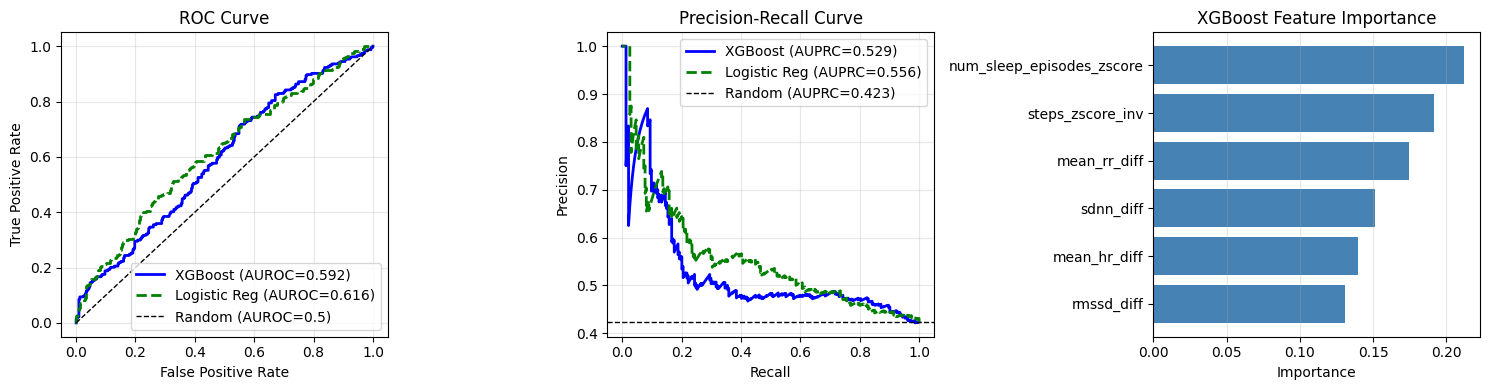


SUMMARY

Combined Model Results (HRV + Sleep + Steps):

  AUROC: 0.5923 (vs 0.5 random)
  AUPRC: 0.5291 (vs 0.4231 random)

The model is 18.5% better than random guessing (AUROC).
The model is 25.0% better than random guessing (AUPRC).

Key predictive features (within-patient deviations):
  1. Fewer steps than personal baseline
  2. More sleep episodes (fragmented sleep)
  3. Changes in nighttime HRV/HR



In [20]:
# =============================================================================
# XGBOOST MODEL HRV AND SLEEP AND STEPS WITH AUROC AND AUPRC
# =============================================================================

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, 
    precision_recall_curve, roc_curve,
    classification_report, confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

print("=" * 70)
print("HRV FEATURE COMPARISON: Relapse vs Non-Relapse (Per Patient + Global)")
print("=" * 70)

hrv_metrics = [
    'rmssd',
    'sdnn',
    'mean_hr',
    'mean_rr',
    'rmssd_diff',
    'sdnn_diff',
    'mean_hr_diff',
    'mean_rr_diff'
]

available_metrics = [m for m in hrv_metrics if m in hrv_features_df.columns]
missing_metrics = [m for m in hrv_metrics if m not in hrv_features_df.columns]

if missing_metrics:
    print(f"Missing metrics in hrv_features_df: {missing_metrics}")


def compute_hrv_ttests(df, metrics):
    """
    Compute Welch's t-test for HRV metrics.

    Args:
        df (pd.DataFrame): HRV feature data for a subset of patients.
        metrics (list[str]): HRV metric column names to test.

    Returns:
        pd.DataFrame: Summary of relapse vs non-relapse stats and p-values.
    """
    rows = []

    for metric in metrics:
        relapse_vals = df[df['relapse'] == 1][metric].dropna()
        non_relapse_vals = df[df['relapse'] == 0][metric].dropna()

        n_rel = len(relapse_vals)
        n_non = len(non_relapse_vals)
        relapse_mean = relapse_vals.mean() if n_rel > 0 else np.nan
        non_relapse_mean = non_relapse_vals.mean() if n_non > 0 else np.nan
        diff = relapse_mean - non_relapse_mean if n_rel > 0 and n_non > 0 else np.nan

        if n_rel >= 2 and n_non >= 2:
            _, p_val = stats.ttest_ind(
                relapse_vals,
                non_relapse_vals,
                equal_var=False,
                nan_policy='omit'
            )
        else:
            p_val = np.nan

        rows.append({
            'metric': metric,
            'relapse_mean': relapse_mean,
            'non_relapse_mean': non_relapse_mean,
            'diff': diff,
            'p_value': p_val,
            'n_relapse': n_rel,
            'n_non_relapse': n_non
        })

    return pd.DataFrame(rows)


def format_hrv_table(results_df):
    """
    Format and sort HRV t-test output.

    Args:
        results_df (pd.DataFrame): Results from compute_hrv_ttests.

    Returns:
        pd.DataFrame: Sorted results.
    """
    return results_df.sort_values('p_value')


def fmt(x):
    """
    Format numeric values for display.

    Args:
        x (float): Value to format.

    Returns:
        str: Formatted value.
    """
    return "nan" if pd.isna(x) else f"{x:.4f}"


print("\n" + "=" * 70)
print("PER-PATIENT HRV METRICS")
print("=" * 70)

for patient in sorted(hrv_features_df['patient_id'].unique()):
    patient_df = hrv_features_df[hrv_features_df['patient_id'] == patient]
    results_df = compute_hrv_ttests(patient_df, available_metrics)
    formatted = format_hrv_table(results_df)

    print(f"\nPatient {patient}")
    if len(formatted) == 0:
        print("  No data")
        continue

    print(
        formatted.to_string(
            index=False,
            formatters={
                'relapse_mean': fmt,
                'non_relapse_mean': fmt,
                'diff': fmt,
                'p_value': fmt
            }
        )
    )

print("\n" + "=" * 70)
print("GLOBAL HRV METRICS")
print("=" * 70)

global_results = compute_hrv_ttests(hrv_features_df, available_metrics)
formatted_global = format_hrv_table(global_results)

print(
    formatted_global.to_string(
        index=False,
        formatters={
            'relapse_mean': fmt,
            'non_relapse_mean': fmt,
            'diff': fmt,
            'p_value': fmt
        }
    )
)

print("\n" + "=" * 70)
print("XGBOOST MODEL: HRV + Sleep + Steps")
print("=" * 70)

# Use the combined dataset from previous cell
val_combined = combined_all[combined_all['split_type'] == 'val']
test_combined = combined_all[combined_all['split_type'] == 'test']

# Feature columns
feature_cols_all = [
    'rmssd_diff',
    'sdnn_diff',
    'mean_hr_diff',
    'mean_rr_diff',
    'steps_zscore_inv',
    'num_sleep_episodes_zscore'
]

X_val = val_combined[feature_cols_all].fillna(0)
y_val = val_combined['relapse']
X_test = test_combined[feature_cols_all].fillna(0)
y_test = test_combined['relapse']

print(f"\nTraining data: {len(X_val)} samples ({y_val.sum()} relapse, {(y_val==0).sum()} non-relapse)")
print(f"Test data: {len(X_test)} samples ({y_test.sum()} relapse, {(y_test==0).sum()} non-relapse)")

# Calculate class weight
scale_pos_weight = (y_val == 0).sum() / (y_val == 1).sum()
print(f"Class imbalance ratio: {scale_pos_weight:.2f}")

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

print("\nTraining XGBoost...")
xgb.fit(X_val, y_val)

# Predictions
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = xgb.predict(X_test)

# Calculate metrics
auroc = roc_auc_score(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)
baseline_prc = y_test.mean()  # Random baseline for AUPRC

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)

print(f"\n  AUROC (ROC-AUC):  {auroc:.4f}  (random baseline: 0.5)")
print(f"  AUPRC (PR-AUC):   {auprc:.4f}  (random baseline: {baseline_prc:.4f})")
print(f"  AUPRC improvement over random: {(auprc / baseline_prc - 1) * 100:.1f}%")

print("\n" + "-" * 70)
print("Classification Report:")
print("-" * 70)
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

print("\n" + "-" * 70)
print("Feature Importance:")
print("-" * 70)
importance_df = pd.DataFrame({
    'feature': feature_cols_all,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)
print(importance_df.to_string(index=False))

# -----------------------------------------------------------------------------
# Compare with Logistic Regression
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("MODEL COMPARISON")
print("=" * 70)

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])
lr.fit(X_val, y_val)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

auroc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auprc_lr = average_precision_score(y_test, y_pred_proba_lr)

print(f"\n{'Model':<25} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 50)
print(f"{'Logistic Regression':<25} {auroc_lr:>10.4f} {auprc_lr:>10.4f}")
print(f"{'XGBoost':<25} {auroc:>10.4f} {auprc:>10.4f}")
print(f"{'Random Baseline':<25} {'0.5000':>10} {baseline_prc:>10.4f}")

# -----------------------------------------------------------------------------
# Visualization
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: ROC Curve
ax1 = axes[0]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

ax1.plot(fpr_xgb, tpr_xgb, 'b-', linewidth=2, label=f'XGBoost (AUROC={auroc:.3f})')
ax1.plot(fpr_lr, tpr_lr, 'g--', linewidth=2, label=f'Logistic Reg (AUROC={auroc_lr:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUROC=0.5)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# Plot 2: Precision-Recall Curve
ax2 = axes[1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)

ax2.plot(recall_xgb, precision_xgb, 'b-', linewidth=2, label=f'XGBoost (AUPRC={auprc:.3f})')
ax2.plot(recall_lr, precision_lr, 'g--', linewidth=2, label=f'Logistic Reg (AUPRC={auprc_lr:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, 
            label=f'Random (AUPRC={baseline_prc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

# Plot 3: Feature Importance
ax3 = axes[2]
importance_sorted = importance_df.sort_values('importance', ascending=True)
ax3.barh(importance_sorted['feature'], importance_sorted['importance'], color='steelblue')
ax3.set_xlabel('Importance')
ax3.set_title('XGBoost Feature Importance')
ax3.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"""
Combined Model Results (HRV + Sleep + Steps):

  AUROC: {auroc:.4f} (vs 0.5 random)
  AUPRC: {auprc:.4f} (vs {baseline_prc:.4f} random)
  
The model is {(auroc - 0.5) / 0.5 * 100:.1f}% better than random guessing (AUROC).
The model is {(auprc / baseline_prc - 1) * 100:.1f}% better than random guessing (AUPRC).

Key predictive features (within-patient deviations):
  1. Fewer steps than personal baseline
  2. More sleep episodes (fragmented sleep)
  3. Changes in nighttime HRV/HR
""")

In [21]:
# =============================================================================
# ADD DEMOGRAPHIC FEATURES
# =============================================================================

print("=" * 70)
print("LOADING DEMOGRAPHIC DATA")
print("=" * 70)

# Load demographics
demographics = pd.read_csv('./track1/demographics.csv')
print(f"\nDemographics shape: {demographics.shape}")
print(f"\nColumns: {demographics.columns.tolist()}")

# Clean column names (strip whitespace)
demographics.columns = demographics.columns.str.strip()

# Display demographics
print("\nDemographics data:")
print(demographics.to_string())

# Select potentially useful features
# Avoid leaky features (anything that might change with relapse status)
demographic_features = [
    'patient_id', 'age', 'gender', 'maritial_status', 'birth_place', 
    'educational_level', 'diagnosis', 'year_illness', 
    'birth_complications', 'family_psychiatric_history',
    'smoking', 'alcohol_consumption', 'cannabis_user',
    'treatment_compliance', 'dominant_hand', 'smartwatch_hand'
]

# Filter to available columns
available_cols = [c for c in demographic_features if c in demographics.columns]
demo_df = demographics[available_cols].copy()

# Clean string columns
for col in demo_df.columns:
    if demo_df[col].dtype == 'object':
        demo_df[col] = demo_df[col].str.strip()

print(f"\nSelected demographic features: {available_cols}")
print(demo_df)

LOADING DEMOGRAPHIC DATA

Demographics shape: (9, 28)

Columns: ['patient_id', 'Unnamed: 1', 'age', 'gender', 'maritial_status', 'birth_place', 'occupation', 'educational_level', 'diagnosis', 'year_illness', 'birth_complications', 'family_psychiatric_history', 'smoking', 'smoking_amount', 'smoking_past_years_use', 'alcohol_consumption', 'alcohol_consumption_amount', 'alcohol_past_years_use', 'cannabis_user', 'cannabis_amount', 'cannabis_past_years_use', 'other_substances', 'other_substances_amount', 'other_substances_past_years_use', 'dominant_hand', 'smartwatch_hand', 'treatment_compliance', 'growth_disorder']

Demographics data:
  patient_id  Unnamed: 1  age   gender maritial_status birth_place            occupation  educational_level                   diagnosis  year_illness  birth_complications  family_psychiatric_history  smoking  smoking_amount  smoking_past_years_use  alcohol_consumption alcohol_consumption_amount  alcohol_past_years_use  cannabis_user  cannabis_amount  cannabis

In [22]:
# =============================================================================
# ENCODE DEMOGRAPHIC FEATURES AND MERGE WITH SENSOR DATA
# =============================================================================

print("=" * 70)
print("ENCODING DEMOGRAPHIC FEATURES")
print("=" * 70)

# Build combined dataset (HRV + all sleep + all step features)
id_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']

step_numeric_cols = step_features_df.select_dtypes(include=[np.number]).columns.tolist()
step_feature_cols = [
    c for c in step_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

sleep_numeric_cols = sleep_features_df.select_dtypes(include=[np.number]).columns.tolist()
sleep_feature_cols = [
    c for c in sleep_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

combined_all = hrv_features_df.merge(
    step_features_df[id_cols + step_feature_cols],
    on=id_cols,
    how='inner'
)

combined_all = combined_all.merge(
    sleep_features_df[id_cols + sleep_feature_cols],
    on=id_cols,
    how='inner',
    suffixes=('', '_sleep')
)

print(f"\nCombined dataset: {len(combined_all)} days")
print(f"Columns: {len(combined_all.columns)}")

# Create encoded version
demo_encoded = demo_df.copy()

# Encode categorical variables
# Gender: Female=0, Male=1
demo_encoded['gender_male'] = (demo_encoded['gender'] == 'Male').astype(int)

# Marital status: Married=1, Single=0
demo_encoded['married'] = (demo_encoded['maritial_status'] == 'Married').astype(int)

# Birth place: Urban=1, Rural=0
demo_encoded['urban'] = (demo_encoded['birth_place'] == 'Urban').astype(int)

# Boolean columns
demo_encoded['birth_complications'] = demo_encoded['birth_complications'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['family_psychiatric_history'] = demo_encoded['family_psychiatric_history'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['smoking'] = demo_encoded['smoking'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['alcohol_consumption'] = demo_encoded['alcohol_consumption'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['cannabis_user'] = demo_encoded['cannabis_user'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})

# Treatment compliance: ordinal encoding
compliance_map = {'Very Good': 3, 'Good': 2, 'Moderate': 1, 'Poor': 0}
demo_encoded['compliance_score'] = demo_encoded['treatment_compliance'].map(compliance_map)

# Diagnosis: One-hot encode (this is important for psychiatric outcomes)
diagnosis_dummies = pd.get_dummies(demo_encoded['diagnosis'], prefix='diag')
demo_encoded = pd.concat([demo_encoded, diagnosis_dummies], axis=1)

# Hand dominance match (smartwatch on dominant hand = 1)
demo_encoded['watch_dominant'] = (demo_encoded['dominant_hand'] == demo_encoded['smartwatch_hand']).astype(int)

# Select final numeric features
demographic_feature_cols = [
    'age', 'educational_level', 'year_illness',
    'gender_male', 'married', 'urban', 
    'birth_complications', 'family_psychiatric_history',
    'smoking', 'alcohol_consumption', 'cannabis_user',
    'compliance_score', 'watch_dominant'
] + [c for c in demo_encoded.columns if c.startswith('diag_')]

# Filter to available
demographic_feature_cols = [c for c in demographic_feature_cols if c in demo_encoded.columns]

print(f"\nEncoded demographic features: {demographic_feature_cols}")
print(f"\nEncoded data:")
print(demo_encoded[['patient_id'] + demographic_feature_cols].to_string())

# Merge with combined sensor data
# First, create a clean patient column in combined_all
combined_with_demo = combined_all.copy()
combined_with_demo = combined_with_demo.merge(
    demo_encoded[['patient_id'] + demographic_feature_cols],
    on='patient_id',
    how='left'
)

print(f"\nCombined data shape: {combined_with_demo.shape}")
print(f"\nSample of merged data:")
print(combined_with_demo[['patient_id', 'split', 'relapse'] + demographic_feature_cols[:5]].head(10))

ENCODING DEMOGRAPHIC FEATURES

Combined dataset: 2295 days
Columns: 43

Encoded demographic features: ['age', 'educational_level', 'year_illness', 'gender_male', 'married', 'urban', 'birth_complications', 'family_psychiatric_history', 'smoking', 'alcohol_consumption', 'cannabis_user', 'compliance_score', 'watch_dominant', 'diag_ Bipolar I Disorder', 'diag_ Bipolar II Disorder', 'diag_ Brief Psyhcotic Episode', 'diag_ Schizophrenia', 'diag_ Schizophreniform Disorder']

Encoded data:
  patient_id  age  educational_level  year_illness  gender_male  married  urban  birth_complications  family_psychiatric_history  smoking  alcohol_consumption  cannabis_user  compliance_score  watch_dominant  diag_ Bipolar I Disorder  diag_ Bipolar II Disorder  diag_ Brief Psyhcotic Episode  diag_ Schizophrenia  diag_ Schizophreniform Disorder
0         P1   30                 16             3            0        0      0                    0                           0        1                    0         

GOOD UP TO HERE

COMPREHENSIVE MODEL: All Sensor Features + Demographics

Train samples: 559
Test samples: 553
Train relapse rate: 0.308
Test relapse rate: 0.423

Feature breakdown:
  HRV features: 13
  Sleep features: 13
  Step features: 5
  Demographic features: 18
  Total features: 56

Class imbalance (scale_pos_weight): 2.25

----------------------------------------------------------------------
Training XGBoost...
----------------------------------------------------------------------

XGBoost Performance:
  AUROC: 0.6322
  AUPRC: 0.5370

----------------------------------------------------------------------
Training Logistic Regression...
----------------------------------------------------------------------

Logistic Regression Performance:
  AUROC: 0.6185
  AUPRC: 0.5376

MODEL COMPARISON

Model                                           AUROC        AUPRC
----------------------------------------------------------------------
XGBoost (All Features)                         0.6322       0.5370
Logi

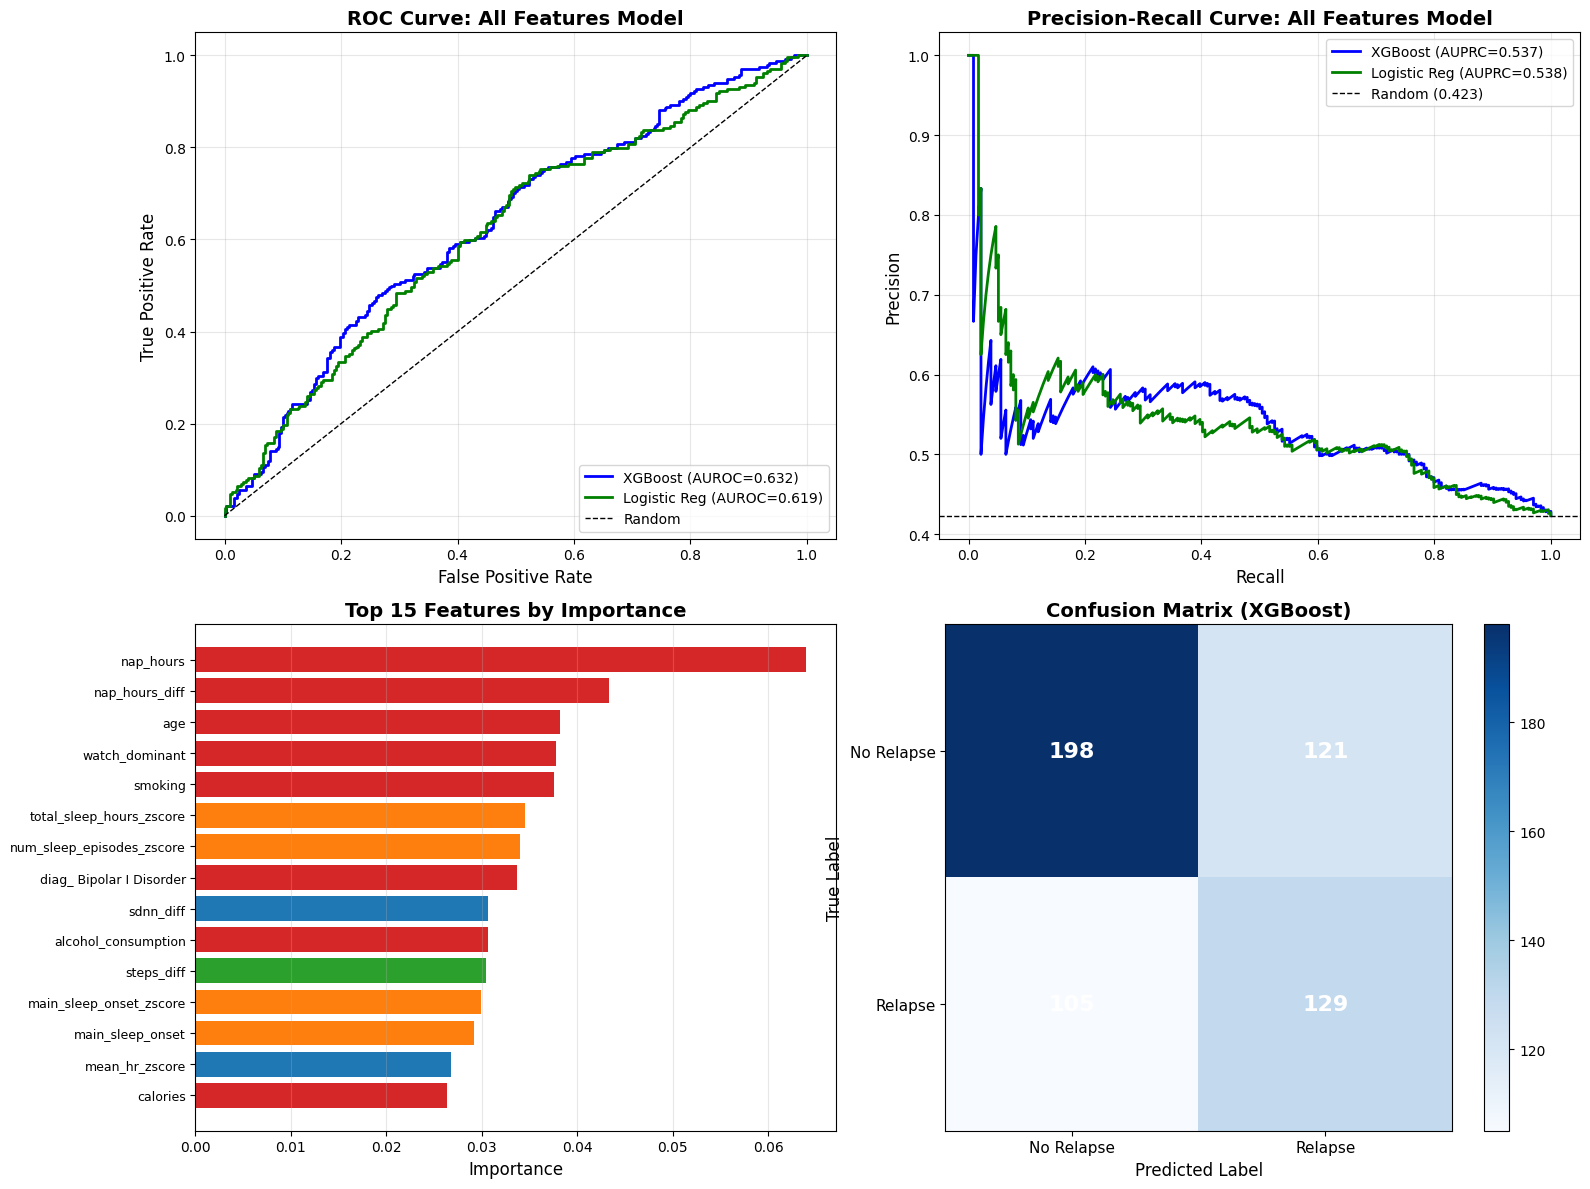


CLASSIFICATION REPORT (XGBoost)
              precision    recall  f1-score   support

  No Relapse       0.65      0.62      0.64       319
     Relapse       0.52      0.55      0.53       234

    accuracy                           0.59       553
   macro avg       0.58      0.59      0.58       553
weighted avg       0.60      0.59      0.59       553



In [23]:
# =============================================================================
# COMPREHENSIVE MODEL: All Sensor Features (HRV + Sleep + Steps) + Demographics
# =============================================================================

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

print("=" * 70)
print("COMPREHENSIVE MODEL: All Sensor Features + Demographics")
print("=" * 70)

# Split into train (val) and test sets
train_data = combined_with_demo[combined_with_demo['split'].str.startswith('val')]
test_data = combined_with_demo[combined_with_demo['split'].str.startswith('test')]

print(f"\nTrain samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Train relapse rate: {train_data['relapse'].mean():.3f}")
print(f"Test relapse rate: {test_data['relapse'].mean():.3f}")

# Define feature sets
# Exclude ID columns and target
exclude_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']
all_feature_cols = [c for c in combined_with_demo.columns if c not in exclude_cols]

# Separate into feature groups for analysis
hrv_features = [c for c in all_feature_cols if any(x in c for x in ['rmssd', 'sdnn', 'mean_hr', 'mean_rr', 'n_valid'])]
sleep_features = [c for c in all_feature_cols if any(x in c for x in ['sleep', 'duration', 'episode'])]
step_features = [c for c in all_feature_cols if 'step' in c]
demographic_features = [c for c in all_feature_cols if c in demographic_feature_cols]

print(f"\nFeature breakdown:")
print(f"  HRV features: {len(hrv_features)}")
print(f"  Sleep features: {len(sleep_features)}")
print(f"  Step features: {len(step_features)}")
print(f"  Demographic features: {len(demographic_features)}")
print(f"  Total features: {len(all_feature_cols)}")

# Prepare data
X_train = train_data[all_feature_cols].fillna(0)
X_test = test_data[all_feature_cols].fillna(0)
y_train = train_data['relapse'].values
y_test = test_data['relapse'].values

# Calculate class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"\nClass imbalance (scale_pos_weight): {scale_pos_weight:.2f}")

# -----------------------------------------------------------------------------
# XGBoost Model
# -----------------------------------------------------------------------------
print("\n" + "-" * 70)
print("Training XGBoost...")
print("-" * 70)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

auroc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
auprc_xgb = average_precision_score(y_test, y_pred_proba_xgb)

print(f"\nXGBoost Performance:")
print(f"  AUROC: {auroc_xgb:.4f}")
print(f"  AUPRC: {auprc_xgb:.4f}")

# -----------------------------------------------------------------------------
# Logistic Regression Model (for comparison)
# -----------------------------------------------------------------------------
print("\n" + "-" * 70)
print("Training Logistic Regression...")
print("-" * 70)

lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])
lr_model.fit(X_train, y_train)

y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict(X_test)

auroc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auprc_lr = average_precision_score(y_test, y_pred_proba_lr)

print(f"\nLogistic Regression Performance:")
print(f"  AUROC: {auroc_lr:.4f}")
print(f"  AUPRC: {auprc_lr:.4f}")

# -----------------------------------------------------------------------------
# Results Summary
# -----------------------------------------------------------------------------
baseline_prc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL COMPARISON")
print("=" * 70)
print(f"\n{'Model':<40} {'AUROC':>12} {'AUPRC':>12}")
print("-" * 70)
print(f"{'XGBoost (All Features)':<40} {auroc_xgb:>12.4f} {auprc_xgb:>12.4f}")
print(f"{'Logistic Regression (All Features)':<40} {auroc_lr:>12.4f} {auprc_lr:>12.4f}")
print("-" * 70)
print(f"{'Random Baseline':<40} {'0.5000':>12} {baseline_prc:>12.4f}")

# -----------------------------------------------------------------------------
# Feature Importance (XGBoost)
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("TOP 20 MOST IMPORTANT FEATURES (XGBoost)")
print("=" * 70)

feature_importance = pd.DataFrame({
    'feature': all_feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n")
for idx, row in feature_importance.head(20).iterrows():
    # Determine feature type
    if row['feature'] in hrv_features:
        feat_type = "HRV"
    elif row['feature'] in sleep_features:
        feat_type = "Sleep"
    elif row['feature'] in step_features:
        feat_type = "Steps"
    elif row['feature'] in demographic_features:
        feat_type = "Demo"
    else:
        feat_type = "Other"
    
    print(f"  {row['feature']:<40} {row['importance']:>8.4f}  [{feat_type}]")

# -----------------------------------------------------------------------------
# Visualizations
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ROC Curve
ax1 = axes[0, 0]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
ax1.plot(fpr_xgb, tpr_xgb, 'b-', linewidth=2, label=f'XGBoost (AUROC={auroc_xgb:.3f})')
ax1.plot(fpr_lr, tpr_lr, 'g-', linewidth=2, label=f'Logistic Reg (AUROC={auroc_lr:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve: All Features Model', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(alpha=0.3)

# PR Curve
ax2 = axes[0, 1]
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
ax2.plot(rec_xgb, prec_xgb, 'b-', linewidth=2, label=f'XGBoost (AUPRC={auprc_xgb:.3f})')
ax2.plot(rec_lr, prec_lr, 'g-', linewidth=2, label=f'Logistic Reg (AUPRC={auprc_lr:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, label=f'Random ({baseline_prc:.3f})')
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Precision', fontsize=12)
ax2.set_title('Precision-Recall Curve: All Features Model', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(alpha=0.3)

# Feature Importance
ax3 = axes[1, 0]
top_features = feature_importance.head(15)
colors = ['#1f77b4' if f in hrv_features else '#ff7f0e' if f in sleep_features else '#2ca02c' if f in step_features else '#d62728' 
          for f in top_features['feature']]
ax3.barh(range(len(top_features)), top_features['importance'], color=colors)
ax3.set_yticks(range(len(top_features)))
ax3.set_yticklabels(top_features['feature'], fontsize=9)
ax3.set_xlabel('Importance', fontsize=12)
ax3.set_title('Top 15 Features by Importance', fontsize=14, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

# Confusion Matrix (XGBoost)
ax4 = axes[1, 1]
cm = confusion_matrix(y_test, y_pred_xgb)
im = ax4.imshow(cm, interpolation='nearest', cmap='Blues')
ax4.set_title('Confusion Matrix (XGBoost)', fontsize=14, fontweight='bold')
tick_marks = [0, 1]
ax4.set_xticks(tick_marks)
ax4.set_yticks(tick_marks)
ax4.set_xticklabels(['No Relapse', 'Relapse'], fontsize=11)
ax4.set_yticklabels(['No Relapse', 'Relapse'], fontsize=11)
ax4.set_ylabel('True Label', fontsize=12)
ax4.set_xlabel('Predicted Label', fontsize=12)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax4.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=16, fontweight='bold')

plt.colorbar(im, ax=ax4)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Classification Report
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("CLASSIFICATION REPORT (XGBoost)")
print("=" * 70)
print(classification_report(y_test, y_pred_xgb, target_names=['No Relapse', 'Relapse']))

In [24]:
# =============================================================================
# SIMPLIFIED APPROACH: Use existing sleep.parquet data instead of accelerometer
# =============================================================================
# The sleep.parquet already contains detected sleep episodes!
# We can use this to filter HRV to actual sleep periods without processing
# the massive accelerometer files.

print("=" * 70)
print("HRV FEATURE ENGINEERING: Sleep-Verified (Using sleep.parquet)")
print("=" * 70)

from pathlib import Path

def process_patient_hrv_with_sleep_episodes(patient, base_path='track1'):
    """
    Filter HRV to periods that fall within detected sleep episodes.
    Uses the existing sleep.parquet data instead of processing accelerometers.
    """
    all_features = []
    
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            hrm_file = f'{base_path}/{patient}/{split}/hrm.parquet'
            sleep_file = f'{base_path}/{patient}/{split}/sleep.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'
            
            if not all(os.path.exists(f) for f in [hrm_file, sleep_file, relapse_file]):
                continue
            
            # Load data
            hrm = pd.read_parquet(hrm_file)
            sleep = pd.read_parquet(sleep_file)
            relapses = pd.read_csv(relapse_file)
            
            if len(sleep) == 0:
                continue
            
            # Convert HRV time to seconds for matching
            hrm['time_str'] = hrm['time'].astype(str)
            hrm['hour'] = hrm['time_str'].str[:2].astype(int)
            hrm['minute'] = hrm['time_str'].str[3:5].astype(int)
            hrm['second'] = hrm['time_str'].str[6:8].astype(int)
            hrm['time_seconds'] = hrm['hour'] * 3600 + hrm['minute'] * 60 + hrm['second']
            
            # Convert sleep times to seconds (columns are start_time, end_time, start_date_index, end_date_index)
            sleep['start_str'] = sleep['start_time'].astype(str)
            sleep['end_str'] = sleep['end_time'].astype(str)
            sleep['start_hour'] = sleep['start_str'].str[:2].astype(int)
            sleep['start_min'] = sleep['start_str'].str[3:5].astype(int)
            sleep['start_sec'] = sleep['start_str'].str[6:8].astype(int)
            sleep['end_hour'] = sleep['end_str'].str[:2].astype(int)
            sleep['end_min'] = sleep['end_str'].str[3:5].astype(int)
            sleep['end_sec'] = sleep['end_str'].str[6:8].astype(int)
            sleep['start_seconds'] = sleep['start_hour'] * 3600 + sleep['start_min'] * 60 + sleep['start_sec']
            sleep['end_seconds'] = sleep['end_hour'] * 3600 + sleep['end_min'] * 60 + sleep['end_sec']
            
            # For each day, filter HRV to sleep periods
            # Sleep episodes span from start_date_index to end_date_index
            sleep_hrm_list = []
            
            for day_idx in relapses['day_index'].unique():
                day_hrm = hrm[hrm['day_index'] == day_idx]
                # Get sleep episodes that include this day (either start or end on this day)
                day_sleep = sleep[(sleep['start_date_index'] == day_idx) | (sleep['end_date_index'] == day_idx)]
                
                if len(day_hrm) == 0 or len(day_sleep) == 0:
                    continue
                
                # Find HRV samples that fall within any sleep episode
                is_during_sleep = pd.Series(False, index=day_hrm.index)
                
                for _, episode in day_sleep.iterrows():
                    start = episode['start_seconds']
                    end = episode['end_seconds']
                    
                    # Handle overnight sleep (end < start means crosses midnight)
                    if end < start:
                        # Sleep crosses midnight: either after start OR before end
                        mask = (day_hrm['time_seconds'] >= start) | (day_hrm['time_seconds'] <= end)
                    else:
                        # Normal: between start and end
                        mask = (day_hrm['time_seconds'] >= start) & (day_hrm['time_seconds'] <= end)
                    
                    is_during_sleep = is_during_sleep | mask
                
                sleep_hrm_day = day_hrm[is_during_sleep]
                if len(sleep_hrm_day) > 0:
                    sleep_hrm_list.append(sleep_hrm_day)
            
            if not sleep_hrm_list:
                continue
                
            sleep_hrm = pd.concat(sleep_hrm_list)
            
            # Calculate daily HRV metrics from sleep-only data
            for day_idx in relapses['day_index'].unique():
                day_data = sleep_hrm[sleep_hrm['day_index'] == day_idx]
                
                if len(day_data) < 100:
                    continue
                
                rr = day_data['rRInterval'].values
                metrics = calculate_hrv_metrics(rr)
                
                all_features.append({
                    'patient_id': patient,
                    'day_index': day_idx,
                    'split': split,
                    'split_type': split_type,
                    'hrv_samples': len(day_data),
                    **metrics
                })
    
    return pd.DataFrame(all_features)


def build_sleep_verified_hrv():
    """
    Process all patients to build sleep-verified HRV features.
    """
    print("\nProcessing HRV filtered to sleep episodes...")
    print("Using sleep.parquet (no accelerometer processing needed)")

    import time as time_module
    start_time = time_module.time()

    hrv_sleep_verified_list = []

    for patient in [f'P{i}' for i in range(1, 10)]:
        patient_start = time_module.time()
        print(f"  Processing {patient}...", end=" ", flush=True)
        patient_hrv = process_patient_hrv_with_sleep_episodes(patient)
        elapsed = time_module.time() - patient_start
        if len(patient_hrv) > 0:
            hrv_sleep_verified_list.append(patient_hrv)
            print(f"✓ {len(patient_hrv)} days ({elapsed:.1f}s)")
        else:
            print(f"✗ No data ({elapsed:.1f}s)")

    total_time = time_module.time() - start_time

    if hrv_sleep_verified_list:
        hrv_sleep_verified_df = pd.concat(hrv_sleep_verified_list, ignore_index=True)
        print(f"\nTotal sleep-verified HRV records: {len(hrv_sleep_verified_df)}")
        print(f"Total processing time: {total_time:.1f}s")
        return hrv_sleep_verified_df

    print("\nNo sleep-verified HRV data generated!")
    return pd.DataFrame()


# Cache setup
cache_dir = Path("./cache")
cache_dir.mkdir(exist_ok=True)
hrv_sleep_verified_path = cache_dir / "hrv_sleep_verified.parquet"

if hrv_sleep_verified_path.exists():
    hrv_sleep_verified_df = pd.read_parquet(hrv_sleep_verified_path)
    print("Loaded sleep-verified HRV features from cache.")
else:
    hrv_sleep_verified_df = build_sleep_verified_hrv()
    if len(hrv_sleep_verified_df) > 0:
        hrv_sleep_verified_df.to_parquet(hrv_sleep_verified_path, index=False)
        print("Saved sleep-verified HRV features to cache.")

HRV FEATURE ENGINEERING: Sleep-Verified (Using sleep.parquet)
Loaded sleep-verified HRV features from cache.


In [25]:
# =============================================================================
# CALCULATE BASELINES AND DEVIATION FEATURES FOR SLEEP-VERIFIED HRV
# =============================================================================

print("=" * 70)
print("SLEEP-VERIFIED HRV: Baselines and Deviation Features")
print("=" * 70)

if len(hrv_sleep_verified_df) > 0:
    # Load relapse labels
    all_relapses = []
    for patient in [f'P{i}' for i in range(1, 10)]:
        for split_type in ['train', 'val', 'test']:
            for split_num in range(3):
                split = f'{split_type}_{split_num}'
                relapse_file = f'track1/{patient}/{split}/relapses.csv'
                if os.path.exists(relapse_file):
                    rel = pd.read_csv(relapse_file)
                    rel['patient_id'] = patient
                    rel['split'] = split
                    all_relapses.append(rel)
    
    relapses_df = pd.concat(all_relapses, ignore_index=True)
    
    # Merge with HRV data
    hrv_sleep_verified_df = hrv_sleep_verified_df.merge(
        relapses_df[['patient_id', 'split', 'day_index', 'relapse']],
        on=['patient_id', 'split', 'day_index'],
        how='left'
    )
    
    # Calculate patient-specific baselines from non-relapse train+val days
    def calculate_hrv_baseline_sleep_verified(patient_df):
        """Calculate baseline HRV from non-relapse train+val days."""
        baseline_data = patient_df[
            (patient_df['split_type'].isin(['train', 'val'])) & 
            (patient_df['relapse'] == 0)
        ]
        
        if len(baseline_data) < 3:
            return None
        
        return {
            'baseline_rmssd': baseline_data['rmssd'].mean(),
            'baseline_rmssd_std': baseline_data['rmssd'].std(),
            'baseline_sdnn': baseline_data['sdnn'].mean(),
            'baseline_sdnn_std': baseline_data['sdnn'].std(),
            'baseline_mean_hr': baseline_data['mean_hr'].mean(),
            'baseline_mean_hr_std': baseline_data['mean_hr'].std()
        }
    
    # Calculate baselines
    patient_baselines_hrv_sv = {}
    for patient in hrv_sleep_verified_df['patient_id'].unique():
        patient_df = hrv_sleep_verified_df[hrv_sleep_verified_df['patient_id'] == patient]
        baseline = calculate_hrv_baseline_sleep_verified(patient_df)
        if baseline:
            patient_baselines_hrv_sv[patient] = baseline
            print(f"{patient}: baseline RMSSD={baseline['baseline_rmssd']:.1f}, "
                  f"SDNN={baseline['baseline_sdnn']:.1f}, HR={baseline['baseline_mean_hr']:.1f}")
    
    # Add deviation features
    def add_hrv_deviation_features_sv(row, baselines):
        """Add deviation features for HRV."""
        patient = row['patient_id']
        if patient not in baselines:
            return row
        
        baseline = baselines[patient]
        
        # RMSSD deviations
        if pd.notna(row.get('rmssd')) and baseline['baseline_rmssd_std'] > 0:
            row['rmssd_diff_sv'] = row['rmssd'] - baseline['baseline_rmssd']
            row['rmssd_zscore_sv'] = row['rmssd_diff_sv'] / baseline['baseline_rmssd_std']
        
        # SDNN deviations
        if pd.notna(row.get('sdnn')) and baseline['baseline_sdnn_std'] > 0:
            row['sdnn_diff_sv'] = row['sdnn'] - baseline['baseline_sdnn']
            row['sdnn_zscore_sv'] = row['sdnn_diff_sv'] / baseline['baseline_sdnn_std']
        
        # Mean HR deviations  
        if pd.notna(row.get('mean_hr')) and baseline['baseline_mean_hr_std'] > 0:
            row['mean_hr_diff_sv'] = row['mean_hr'] - baseline['baseline_mean_hr']
            row['mean_hr_zscore_sv'] = row['mean_hr_diff_sv'] / baseline['baseline_mean_hr_std']
        
        return row
    
    hrv_sleep_verified_df = hrv_sleep_verified_df.apply(
        lambda row: add_hrv_deviation_features_sv(row, patient_baselines_hrv_sv), 
        axis=1
    )
    
    print(f"\nSleep-verified HRV features shape: {hrv_sleep_verified_df.shape}")
    print(f"\nFeature columns: {hrv_sleep_verified_df.columns.tolist()}")
    
    # Compare with original nighttime-only HRV
    print("\n" + "-" * 70)
    print("Comparison: Sleep-Verified vs Nighttime-Only HRV")
    print("-" * 70)
    
    # Merge for comparison
    comparison = hrv_sleep_verified_df.merge(
        hrv_features_df[['patient_id', 'split', 'day_index', 'rmssd', 'sdnn', 'mean_hr']],
        on=['patient_id', 'split', 'day_index'],
        how='inner',
        suffixes=('_sleep', '_night')
    )
    
    if len(comparison) > 0:
        print(f"\nOverlapping days: {len(comparison)}")
        print(f"\nRMSSD correlation: {comparison['rmssd_sleep'].corr(comparison['rmssd_night']):.3f}")
        print(f"SDNN correlation: {comparison['sdnn_sleep'].corr(comparison['sdnn_night']):.3f}")
        print(f"Mean HR correlation: {comparison['mean_hr_sleep'].corr(comparison['mean_hr_night']):.3f}")
        
        print(f"\nMean RMSSD - Sleep verified: {comparison['rmssd_sleep'].mean():.1f}")
        print(f"Mean RMSSD - Nighttime only: {comparison['rmssd_night'].mean():.1f}")
else:
    print("No sleep-verified HRV data available")

SLEEP-VERIFIED HRV: Baselines and Deviation Features
P1: baseline RMSSD=25.4, SDNN=151.1, HR=77.0
P2: baseline RMSSD=19.8, SDNN=174.3, HR=63.1
P3: baseline RMSSD=26.8, SDNN=151.5, HR=64.9
P4: baseline RMSSD=19.1, SDNN=127.3, HR=69.4
P5: baseline RMSSD=17.5, SDNN=125.1, HR=76.5
P6: baseline RMSSD=18.3, SDNN=124.9, HR=76.7
P7: baseline RMSSD=21.8, SDNN=135.8, HR=65.3
P8: baseline RMSSD=23.5, SDNN=158.6, HR=63.1
P9: baseline RMSSD=26.3, SDNN=142.4, HR=66.7

Sleep-verified HRV features shape: (2377, 17)

Feature columns: ['day_index', 'hrv_samples', 'mean_hr', 'mean_hr_diff_sv', 'mean_hr_zscore_sv', 'mean_rr', 'n_valid', 'patient_id', 'relapse', 'rmssd', 'rmssd_diff_sv', 'rmssd_zscore_sv', 'sdnn', 'sdnn_diff_sv', 'sdnn_zscore_sv', 'split', 'split_type']

----------------------------------------------------------------------
Comparison: Sleep-Verified vs Nighttime-Only HRV
----------------------------------------------------------------------

Overlapping days: 1976

RMSSD correlation: 0.86

In [26]:
# =============================================================================
# BUILD COMBINED DATASET (HRV + ALL SLEEP + ALL STEP FEATURES)
# =============================================================================

print("=" * 70)
print("BUILDING COMBINED HRV + SLEEP + STEPS DATASET")
print("=" * 70)

id_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']

step_numeric_cols = step_features_df.select_dtypes(include=[np.number]).columns.tolist()
step_feature_cols = [
    c for c in step_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

sleep_numeric_cols = sleep_features_df.select_dtypes(include=[np.number]).columns.tolist()
sleep_feature_cols = [
    c for c in sleep_numeric_cols
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]

combined_all = hrv_features_df.merge(
    step_features_df[id_cols + step_feature_cols],
    on=id_cols,
    how='inner'
)

combined_all = combined_all.merge(
    sleep_features_df[id_cols + sleep_feature_cols],
    on=id_cols,
    how='inner',
    suffixes=('', '_sleep')
)

print(f"\nCombined dataset: {len(combined_all)} days")
print(f"Columns: {len(combined_all.columns)}")
print("Contains mean_rr_diff:", 'mean_rr_diff' in combined_all.columns)


BUILDING COMBINED HRV + SLEEP + STEPS DATASET

Combined dataset: 2295 days
Columns: 43
Contains mean_rr_diff: True


COMPREHENSIVE MODEL: All Available Features

Merging all feature sources...
  Combined dataset shape: (2295, 70)
  Sleep-verified HRV features added: 9

Train samples: 559
Test samples: 553
Train relapse rate: 0.308
Test relapse rate: 0.423

Feature breakdown:
  Nighttime HRV: 13
  Sleep-Verified HRV: 6
  Sleep: 13
  Steps: 5
  Demographics: 18
  Other: 10
  Total: 65

Class imbalance (scale_pos_weight): 2.25

----------------------------------------------------------------------
Training XGBoost with ALL features...
----------------------------------------------------------------------

XGBoost Performance:
  AUROC: 0.6099
  AUPRC: 0.5251

----------------------------------------------------------------------
Training Logistic Regression with ALL features...
----------------------------------------------------------------------

Logistic Regression Performance:
  AUROC: 0.6092
  AUPRC: 0.5255

MODEL COMPARISON

Model                                                AUROC        AUPRC
--

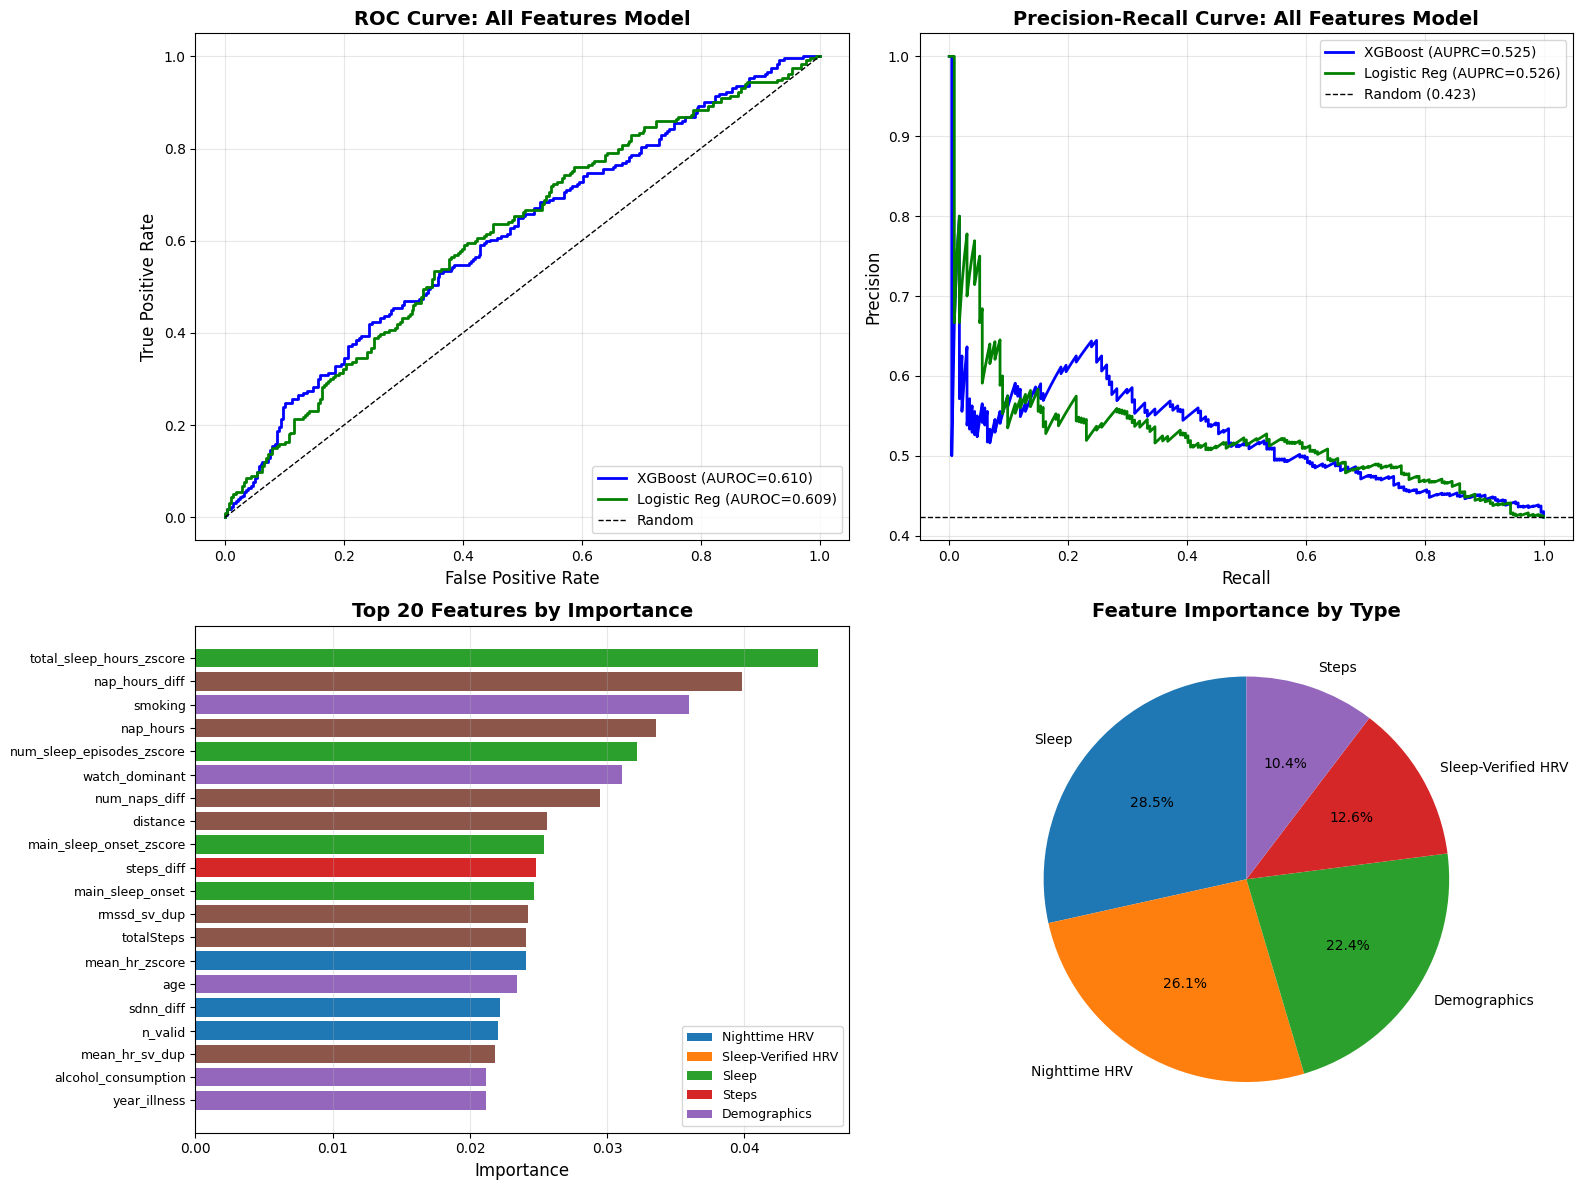


CLASSIFICATION REPORT (XGBoost)
              precision    recall  f1-score   support

  No Relapse       0.65      0.63      0.64       319
     Relapse       0.51      0.53      0.52       234

    accuracy                           0.59       553
   macro avg       0.58      0.58      0.58       553
weighted avg       0.59      0.59      0.59       553



In [27]:
# =============================================================================
# COMPREHENSIVE MODEL: All Features (Nighttime HRV + Sleep-Verified HRV + Sleep + Steps + Demographics)
# =============================================================================

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

print("=" * 70)
print("COMPREHENSIVE MODEL: All Available Features")
print("=" * 70)

# Check if sleep-verified HRV data is available
if len(hrv_sleep_verified_df) > 0:
    print("\nMerging all feature sources...")
    
    # Merge sleep-verified HRV features with combined_with_demo
    # combined_with_demo already has: nighttime HRV + all sleep + all steps + demographics
    sv_hrv_cols = [c for c in hrv_sleep_verified_df.columns 
                   if c.endswith('_sv') or c in ['rmssd', 'sdnn', 'mean_hr']]
    
    comprehensive_data = combined_with_demo.merge(
        hrv_sleep_verified_df[['patient_id', 'split', 'day_index'] + sv_hrv_cols],
        on=['patient_id', 'split', 'day_index'],
        how='left',
        suffixes=('', '_sv_dup')
    )
    
    print(f"  Combined dataset shape: {comprehensive_data.shape}")
    print(f"  Sleep-verified HRV features added: {len(sv_hrv_cols)}")
    
    # Split into train and test
    train_data = comprehensive_data[comprehensive_data['split'].str.startswith('val')]
    test_data = comprehensive_data[comprehensive_data['split'].str.startswith('test')]
    
    print(f"\nTrain samples: {len(train_data)}")
    print(f"Test samples: {len(test_data)}")
    print(f"Train relapse rate: {train_data['relapse'].mean():.3f}")
    print(f"Test relapse rate: {test_data['relapse'].mean():.3f}")
    
    # Define feature sets and categorize
    exclude_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']
    all_feature_cols = [c for c in comprehensive_data.columns if c not in exclude_cols]
    
    # Categorize features by type
    nighttime_hrv_features = [c for c in all_feature_cols 
                              if any(x in c for x in ['rmssd', 'sdnn', 'mean_hr', 'mean_rr', 'n_valid']) 
                              and not c.endswith('_sv') and not c.endswith('_sv_dup')]
    
    sleep_verified_hrv_features = [c for c in all_feature_cols if c.endswith('_sv')]
    
    sleep_features = [c for c in all_feature_cols 
                      if any(x in c for x in ['sleep', 'duration', 'episode', 'onset']) 
                      and not any(x in c for x in ['rmssd', 'sdnn', 'mean_hr'])]
    
    step_features = [c for c in all_feature_cols if 'step' in c]
    
    demographic_features = [c for c in all_feature_cols 
                           if c in demographic_feature_cols]
    
    other_features = [c for c in all_feature_cols 
                     if c not in nighttime_hrv_features 
                     and c not in sleep_verified_hrv_features 
                     and c not in sleep_features 
                     and c not in step_features 
                     and c not in demographic_features]
    
    print(f"\nFeature breakdown:")
    print(f"  Nighttime HRV: {len(nighttime_hrv_features)}")
    print(f"  Sleep-Verified HRV: {len(sleep_verified_hrv_features)}")
    print(f"  Sleep: {len(sleep_features)}")
    print(f"  Steps: {len(step_features)}")
    print(f"  Demographics: {len(demographic_features)}")
    print(f"  Other: {len(other_features)}")
    print(f"  Total: {len(all_feature_cols)}")
    
    # Prepare data
    X_train = train_data[all_feature_cols].fillna(0)
    X_test = test_data[all_feature_cols].fillna(0)
    y_train = train_data['relapse'].values
    y_test = test_data['relapse'].values
    
    # Calculate class imbalance
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    print(f"\nClass imbalance (scale_pos_weight): {scale_pos_weight:.2f}")
    
    # -------------------------------------------------------------------------
    # XGBoost Model
    # -------------------------------------------------------------------------
    print("\n" + "-" * 70)
    print("Training XGBoost with ALL features...")
    print("-" * 70)
    
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    
    y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    y_pred_xgb = xgb_model.predict(X_test)
    
    auroc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    auprc_xgb = average_precision_score(y_test, y_pred_proba_xgb)
    
    print(f"\nXGBoost Performance:")
    print(f"  AUROC: {auroc_xgb:.4f}")
    print(f"  AUPRC: {auprc_xgb:.4f}")
    
    # -------------------------------------------------------------------------
    # Logistic Regression Model
    # -------------------------------------------------------------------------
    print("\n" + "-" * 70)
    print("Training Logistic Regression with ALL features...")
    print("-" * 70)
    
    lr_model = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
    ])
    lr_model.fit(X_train, y_train)
    
    y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
    y_pred_lr = lr_model.predict(X_test)
    
    auroc_lr = roc_auc_score(y_test, y_pred_proba_lr)
    auprc_lr = average_precision_score(y_test, y_pred_proba_lr)
    
    print(f"\nLogistic Regression Performance:")
    print(f"  AUROC: {auroc_lr:.4f}")
    print(f"  AUPRC: {auprc_lr:.4f}")
    
    # -------------------------------------------------------------------------
    # Results Summary
    # -------------------------------------------------------------------------
    baseline_prc = y_test.mean()
    
    print("\n" + "=" * 70)
    print("MODEL COMPARISON")
    print("=" * 70)
    print(f"\n{'Model':<45} {'AUROC':>12} {'AUPRC':>12}")
    print("-" * 70)
    print(f"{'XGBoost (All Features)':<45} {auroc_xgb:>12.4f} {auprc_xgb:>12.4f}")
    print(f"{'Logistic Regression (All Features)':<45} {auroc_lr:>12.4f} {auprc_lr:>12.4f}")
    print("-" * 70)
    print(f"{'Random Baseline':<45} {'0.5000':>12} {baseline_prc:>12.4f}")
    
    # -------------------------------------------------------------------------
    # Feature Importance Analysis (XGBoost)
    # -------------------------------------------------------------------------
    print("\n" + "=" * 70)
    print("TOP 25 MOST IMPORTANT FEATURES (XGBoost)")
    print("=" * 70)
    
    feature_importance = pd.DataFrame({
        'feature': all_feature_cols,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    def get_feature_type(feat):
        if feat in nighttime_hrv_features:
            return "Nighttime-HRV"
        elif feat in sleep_verified_hrv_features:
            return "Sleep-Verified-HRV"
        elif feat in sleep_features:
            return "Sleep"
        elif feat in step_features:
            return "Steps"
        elif feat in demographic_features:
            return "Demographics"
        else:
            return "Other"
    
    print("\n")
    for idx, row in feature_importance.head(25).iterrows():
        feat_type = get_feature_type(row['feature'])
        print(f"  {row['feature']:<45} {row['importance']:>8.4f}  [{feat_type}]")
    
    # Feature type importance summary
    print("\n" + "-" * 70)
    print("FEATURE IMPORTANCE BY TYPE")
    print("-" * 70)
    
    type_importance = {}
    for feat_type, feat_list in [
        ('Nighttime HRV', nighttime_hrv_features),
        ('Sleep-Verified HRV', sleep_verified_hrv_features),
        ('Sleep', sleep_features),
        ('Steps', step_features),
        ('Demographics', demographic_features)
    ]:
        type_imp = feature_importance[feature_importance['feature'].isin(feat_list)]['importance'].sum()
        type_importance[feat_type] = type_imp
    
    total_imp = sum(type_importance.values())
    print("\n")
    for feat_type, imp in sorted(type_importance.items(), key=lambda x: x[1], reverse=True):
        pct = (imp / total_imp * 100) if total_imp > 0 else 0
        print(f"  {feat_type:<25} {imp:>8.4f}  ({pct:>5.1f}%)")
    
    # -------------------------------------------------------------------------
    # Visualizations
    # -------------------------------------------------------------------------
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # ROC Curve
    ax1 = axes[0, 0]
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
    ax1.plot(fpr_xgb, tpr_xgb, 'b-', linewidth=2, label=f'XGBoost (AUROC={auroc_xgb:.3f})')
    ax1.plot(fpr_lr, tpr_lr, 'g-', linewidth=2, label=f'Logistic Reg (AUROC={auroc_lr:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.set_title('ROC Curve: All Features Model', fontsize=14, fontweight='bold')
    ax1.legend(loc='lower right', fontsize=10)
    ax1.grid(alpha=0.3)
    
    # PR Curve
    ax2 = axes[0, 1]
    prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
    prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
    ax2.plot(rec_xgb, prec_xgb, 'b-', linewidth=2, label=f'XGBoost (AUPRC={auprc_xgb:.3f})')
    ax2.plot(rec_lr, prec_lr, 'g-', linewidth=2, label=f'Logistic Reg (AUPRC={auprc_lr:.3f})')
    ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, label=f'Random ({baseline_prc:.3f})')
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Precision-Recall Curve: All Features Model', fontsize=14, fontweight='bold')
    ax2.legend(loc='upper right', fontsize=10)
    ax2.grid(alpha=0.3)
    
    # Feature Importance by Type
    ax3 = axes[1, 0]
    top_features = feature_importance.head(20)
    colors = []
    for f in top_features['feature']:
        ftype = get_feature_type(f)
        if ftype == 'Nighttime-HRV':
            colors.append('#1f77b4')
        elif ftype == 'Sleep-Verified-HRV':
            colors.append('#ff7f0e')
        elif ftype == 'Sleep':
            colors.append('#2ca02c')
        elif ftype == 'Steps':
            colors.append('#d62728')
        elif ftype == 'Demographics':
            colors.append('#9467bd')
        else:
            colors.append('#8c564b')
    
    ax3.barh(range(len(top_features)), top_features['importance'], color=colors)
    ax3.set_yticks(range(len(top_features)))
    ax3.set_yticklabels(top_features['feature'], fontsize=9)
    ax3.set_xlabel('Importance', fontsize=12)
    ax3.set_title('Top 20 Features by Importance', fontsize=14, fontweight='bold')
    ax3.invert_yaxis()
    ax3.grid(axis='x', alpha=0.3)
    
    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#1f77b4', label='Nighttime HRV'),
        Patch(facecolor='#ff7f0e', label='Sleep-Verified HRV'),
        Patch(facecolor='#2ca02c', label='Sleep'),
        Patch(facecolor='#d62728', label='Steps'),
        Patch(facecolor='#9467bd', label='Demographics')
    ]
    ax3.legend(handles=legend_elements, loc='lower right', fontsize=9)
    
    # Feature Type Importance Pie Chart
    ax4 = axes[1, 1]
    type_labels = []
    type_values = []
    type_colors_pie = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for i, (feat_type, imp) in enumerate(sorted(type_importance.items(), key=lambda x: x[1], reverse=True)):
        if imp > 0:
            type_labels.append(feat_type)
            type_values.append(imp)
    
    ax4.pie(type_values, labels=type_labels, autopct='%1.1f%%', startangle=90, 
            colors=type_colors_pie[:len(type_values)])
    ax4.set_title('Feature Importance by Type', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # -------------------------------------------------------------------------
    # Classification Report
    # -------------------------------------------------------------------------
    print("\n" + "=" * 70)
    print("CLASSIFICATION REPORT (XGBoost)")
    print("=" * 70)
    print(classification_report(y_test, y_pred_xgb, target_names=['No Relapse', 'Relapse']))
    
else:
    print("\nERROR: Sleep-verified HRV data not available.")
    print("Please run the sleep-verified HRV feature engineering cell first.")


GOOD to HERE

In [28]:
# =============================================================================
# CIRCADIAN ACTIVITY PATTERN FEATURES (Percentage-Based)
# =============================================================================
# Create hourly activity profiles and detect deviations from normal patterns
# Using percentage-based metrics for better robustness and interpretability

print("=" * 70)
print("CIRCADIAN ACTIVITY PATTERN FEATURES (Percentage-Based)")
print("=" * 70)

from pathlib import Path

def process_patient_circadian(patient, base_path='track1', downsample=100, use_linacc=True, w_gyr=0.5, w_lin=0.5):
    """
    Extract hourly activity patterns from gyroscope and optionally linear accelerometer.
    When use_linacc=True, activity is a weighted sum of gyro and linacc magnitudes (Option 1B).

    Args:
        patient: Patient ID
        base_path: Data directory
        downsample: Take every Nth sample (100 = 0.2Hz from 20Hz)
        use_linacc: If True, load linacc.parquet and fuse with gyr via weighted sum
        w_gyr: Weight for gyroscope magnitude (default 0.5)
        w_lin: Weight for linear accelerometer magnitude (default 0.5)

    Returns:
        hourly_df: DataFrame with hourly activity data
        baseline_profile: Baseline percentages and counts per hour
    """
    all_hourly_data = []

    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            gyr_file = f'{base_path}/{patient}/{split}/gyr.parquet'
            linacc_file = f'{base_path}/{patient}/{split}/linacc.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'

            if not os.path.exists(gyr_file) or not os.path.exists(relapse_file):
                continue

            # Load gyroscope with heavy downsampling
            gyr = pd.read_parquet(gyr_file, columns=['X', 'Y', 'Z', 'time', 'day_index'])
            gyr = gyr.iloc[::downsample].copy()

            relapses = pd.read_csv(relapse_file)

            if len(gyr) == 0:
                continue

            # Option 1B: Fuse with linear accelerometer when available (align by time_key to keep rows)
            if use_linacc and os.path.exists(linacc_file):
                linacc = pd.read_parquet(linacc_file, columns=['X', 'Y', 'Z', 'time', 'day_index'])
                linacc = linacc.iloc[::downsample].copy()
                # Round time to 1s so gyr and linacc align without exact timestamp match
                t_gyr = gyr['time'].astype(str)
                gyr['time_key'] = pd.to_datetime(t_gyr.where(t_gyr.str.contains(r'\.\d+', regex=True), t_gyr + '.0'), format='%H:%M:%S.%f').dt.round('1s')
                t_lin = linacc['time'].astype(str)
                linacc['time_key'] = pd.to_datetime(t_lin.where(t_lin.str.contains(r'\.\d+', regex=True), t_lin + '.0'), format='%H:%M:%S.%f').dt.round('1s')
                # One linacc row per (day_index, time_key)
                linacc_agg = linacc.groupby(['day_index', 'time_key']).agg({'X': 'mean', 'Y': 'mean', 'Z': 'mean'}).reset_index()
                linacc_agg = linacc_agg.rename(columns={'X': 'X_lin', 'Y': 'Y_lin', 'Z': 'Z_lin'})
                gyr_merge = gyr.rename(columns={'X': 'X_gyr', 'Y': 'Y_gyr', 'Z': 'Z_gyr'})
                merged = gyr_merge.merge(
                    linacc_agg,
                    on=['day_index', 'time_key'],
                    how='left'
                )
                # Magnitude: use 0 for missing linacc so fused = gyr-only where linacc absent
                merged['X_lin'] = merged['X_lin'].fillna(0)
                merged['Y_lin'] = merged['Y_lin'].fillna(0)
                merged['Z_lin'] = merged['Z_lin'].fillna(0)
                mag_gyr = np.sqrt(merged['X_gyr']**2 + merged['Y_gyr']**2 + merged['Z_gyr']**2)
                mag_lin = np.sqrt(merged['X_lin']**2 + merged['Y_lin']**2 + merged['Z_lin']**2)
                merged['magnitude'] = w_gyr * mag_gyr + w_lin * mag_lin
                merged['hour'] = merged['time'].astype(str).str[:2].astype(int)
                activity_df = merged[['day_index', 'hour', 'magnitude']]
                del linacc
            else:
                gyr['magnitude'] = np.sqrt(gyr['X']**2 + gyr['Y']**2 + gyr['Z']**2)
                gyr['hour'] = gyr['time'].astype(str).str[:2].astype(int)
                activity_df = gyr[['day_index', 'hour', 'magnitude']]

            # Aggregate by day and hour
            hourly = activity_df.groupby(['day_index', 'hour']).agg({
                'magnitude': ['mean', 'std', 'count']
            }).reset_index()
            hourly.columns = ['day_index', 'hour', 'activity_mean', 'activity_std', 'sample_count']

            hourly['patient_id'] = patient
            hourly['split'] = split
            hourly['split_type'] = split_type

            hourly = hourly.merge(
                relapses[['day_index', 'relapse']],
                on='day_index',
                how='left'
            )

            all_hourly_data.append(hourly)
            del gyr
    
    if not all_hourly_data:
        return pd.DataFrame(), pd.DataFrame()
    
    hourly_df = pd.concat(all_hourly_data, ignore_index=True)
    
    # Calculate patient's baseline from non-relapse train+val days
    baseline_data = hourly_df[
        (hourly_df['split_type'].isin(['train', 'val'])) & 
        (hourly_df['relapse'] == 0)
    ]
    
    if len(baseline_data) == 0:
        return hourly_df, pd.DataFrame()
    
    # For each day in baseline, calculate hourly percentages
    baseline_daily_pcts = []
    for day_idx in baseline_data['day_index'].unique():
        day_data = baseline_data[baseline_data['day_index'] == day_idx]
        daily_total = day_data['activity_mean'].sum()
        if daily_total > 0:
            day_data = day_data.copy()
            day_data['activity_pct'] = (day_data['activity_mean'] / daily_total * 100)
            baseline_daily_pcts.append(day_data[['hour', 'activity_pct', 'activity_mean']])
    
    if not baseline_daily_pcts:
        return hourly_df, pd.DataFrame()
    
    baseline_pct_df = pd.concat(baseline_daily_pcts, ignore_index=True)
    
    # Calculate baseline: mean and std of percentages per hour
    baseline_profile = baseline_pct_df.groupby('hour').agg({
        'activity_pct': ['mean', 'std'],
        'activity_mean': ['mean', 'std']  # Keep count-based for comparison
    }).reset_index()
    baseline_profile.columns = ['hour', 'baseline_activity_pct', 'baseline_activity_pct_std',
                                'baseline_activity', 'baseline_activity_std']
    
    # Replace 0 std with small value to avoid division by zero
    baseline_profile['baseline_activity_pct_std'] = baseline_profile['baseline_activity_pct_std'].replace(0, 0.1)
    baseline_profile['baseline_activity_std'] = baseline_profile['baseline_activity_std'].replace(0, 0.1)
    
    return hourly_df, baseline_profile


def calculate_circadian_features(hourly_df, baseline_profile, patient):
    """
    Calculate daily circadian deviation features using percentage-based metrics.
    
    Features (percentage-based - NEW):
    - night_activity_proportion: % of daily activity during 0-6 AM
    - day_activity_proportion: % of daily activity during 9 AM-9 PM
    - circadian_deviation_pct: Overall deviation from baseline percentage pattern
    - circadian_shift_pct: Shift in peak activity hour (by percentage)
    
    Features (count-based - kept for comparison):
    - circadian_deviation: Overall deviation from baseline (count-based)
    - night_activity_zscore: Night activity z-score (count-based)
    - day_activity_zscore: Day activity z-score (count-based)
    - circadian_shift: Shift in peak activity hour (count-based)
    """
    if len(baseline_profile) == 0:
        return pd.DataFrame()
    
    # Merge baseline into hourly data
    hourly_with_baseline = hourly_df.merge(baseline_profile, on='hour', how='left')
    
    # Calculate count-based z-score for each hour (original method)
    hourly_with_baseline['hour_zscore'] = (
        (hourly_with_baseline['activity_mean'] - hourly_with_baseline['baseline_activity']) / 
        hourly_with_baseline['baseline_activity_std']
    )
    
    # Aggregate to daily features
    daily_features = []
    
    for (day_idx, split), day_data in hourly_with_baseline.groupby(['day_index', 'split']):
        if len(day_data) < 12:  # Need at least half the hours
            continue
        
        # Calculate daily total for percentage conversion
        daily_total = day_data['activity_mean'].sum()
        
        if daily_total == 0:  # Skip days with no activity
            continue
        
        # Convert to percentages
        day_data = day_data.copy()
        day_data['activity_pct'] = (day_data['activity_mean'] / daily_total * 100)
        
        # =====================================================================
        # PERCENTAGE-BASED FEATURES (NEW)
        # =====================================================================
        
        # 1. Night activity proportion (% of daily activity at night)
        night_hours = day_data[day_data['hour'].isin([0, 1, 2, 3, 4, 5, 6])]
        night_activity_proportion = night_hours['activity_pct'].sum() if len(night_hours) > 0 else 0
        
        # 2. Day activity proportion (% of daily activity during day)
        day_hours = day_data[day_data['hour'].isin(range(9, 22))]
        day_activity_proportion = day_hours['activity_pct'].sum() if len(day_hours) > 0 else 0
        
        # 3. Peak hour by percentage
        peak_hour_pct = day_data.loc[day_data['activity_pct'].idxmax(), 'hour']
        baseline_peak_pct = baseline_profile.loc[baseline_profile['baseline_activity_pct'].idxmax(), 'hour']
        circadian_shift_pct = abs(peak_hour_pct - baseline_peak_pct)
        if circadian_shift_pct > 12:  # Handle wrap-around
            circadian_shift_pct = 24 - circadian_shift_pct
        
        # 4. Percentage-based z-scores
        day_data['pct_zscore'] = (
            (day_data['activity_pct'] - day_data['baseline_activity_pct']) / 
            day_data['baseline_activity_pct_std']
        )
        circadian_deviation_pct = (day_data['pct_zscore'] ** 2).mean()
        
        # =====================================================================
        # COUNT-BASED FEATURES (ORIGINAL - kept for comparison)
        # =====================================================================
        
        # Overall circadian deviation (mean squared z-score)
        circadian_deviation = (day_data['hour_zscore'] ** 2).mean()
        
        #midnight to 6 am
        # Night activity z-score (count-based)
        night_data = day_data[day_data['hour'].isin([0, 1, 2, 3, 4, 5, 6])]
        night_activity_zscore = night_data['hour_zscore'].mean() if len(night_data) > 0 else 0
        
        #9am to 10pm
        # Day activity z-score (count-based)
        day_data_hours = day_data[day_data['hour'].isin(range(9, 22))]
        day_activity_zscore = day_data_hours['hour_zscore'].mean() if len(day_data_hours) > 0 else 0
        
        # Peak activity hour (count-based)
        peak_hour = day_data.loc[day_data['activity_mean'].idxmax(), 'hour']
        baseline_peak = baseline_profile.loc[baseline_profile['baseline_activity'].idxmax(), 'hour']
        circadian_shift = abs(peak_hour - baseline_peak)
        if circadian_shift > 12:  # Handle wrap-around
            circadian_shift = 24 - circadian_shift
        
        daily_features.append({
            'patient_id': patient,
            'day_index': day_idx,
            'split': split,
            'split_type': day_data['split_type'].iloc[0],
            'relapse': day_data['relapse'].iloc[0],
            # Percentage-based features (NEW)
            'night_activity_proportion': night_activity_proportion,
            'day_activity_proportion': day_activity_proportion,
            'circadian_deviation_pct': circadian_deviation_pct,
            'circadian_shift_pct': circadian_shift_pct,
            # Count-based features (ORIGINAL)
            'circadian_deviation': circadian_deviation,
            'night_activity_zscore': night_activity_zscore,
            'day_activity_zscore': day_activity_zscore,
            'circadian_shift': circadian_shift
        })
    
    return pd.DataFrame(daily_features)


def build_circadian_features():
    """
    Process all patients to build circadian activity pattern features.
    """
    print("\nExtracting circadian activity patterns...")
    print("Using 100x downsampling (0.2Hz from 20Hz)")
    print("Fusing gyro + linacc (Option 1B weighted sum); computing percentage-based and count-based features")

    import time as time_module
    start_time = time_module.time()

    circadian_features_list = []

    for patient in [f'P{i}' for i in range(1, 10)]:
        patient_start = time_module.time()
        print(f"  Processing {patient}...", end=" ", flush=True)
        
        hourly_df, baseline_profile = process_patient_circadian(patient)
        
        if len(hourly_df) > 0 and len(baseline_profile) > 0:
            patient_features = calculate_circadian_features(hourly_df, baseline_profile, patient)
            if len(patient_features) > 0:
                circadian_features_list.append(patient_features)
                elapsed = time_module.time() - patient_start
                print(f"✓ {len(patient_features)} days ({elapsed:.1f}s)")
            else:
                print("✗ No features")
        else:
            print("✗ No data")

    total_time = time_module.time() - start_time

    if circadian_features_list:
        circadian_features_df = pd.concat(circadian_features_list, ignore_index=True)
        print(f"\nTotal circadian feature records: {len(circadian_features_df)}")
        print(f"Total processing time: {total_time:.1f}s")
        
        # Show feature summary
        print("\n" + "-" * 70)
        print("Circadian Feature Summary:")
        print("-" * 70)
        print("\nPercentage-based features:")
        print(circadian_features_df[['night_activity_proportion', 'day_activity_proportion', 
                                      'circadian_deviation_pct', 'circadian_shift_pct']].describe())
        print("\nCount-based features (for comparison):")
        print(circadian_features_df[['circadian_deviation', 'night_activity_zscore', 
                                      'day_activity_zscore', 'circadian_shift']].describe())
        return circadian_features_df

    print("\nNo circadian features generated!")
    return pd.DataFrame()


# Cache setup - NEW FILENAME to force recomputation
cache_dir = Path("./cache")
cache_dir.mkdir(exist_ok=True)
circadian_features_path = cache_dir / "circadian_features_fused_v2.parquet"

if circadian_features_path.exists():
    circadian_features_df = pd.read_parquet(circadian_features_path)
    print("Loaded fused (gyr+linacc) circadian features from cache.")
    print(f"Features available: {list(circadian_features_df.columns)}")
else:
    circadian_features_df = build_circadian_features()
    if len(circadian_features_df) > 0:
        circadian_features_df.to_parquet(circadian_features_path, index=False)
        print("Saved fused (gyr+linacc) circadian features to cache.")


CIRCADIAN ACTIVITY PATTERN FEATURES (Percentage-Based)
Loaded fused (gyr+linacc) circadian features from cache.
Features available: ['patient_id', 'day_index', 'split', 'split_type', 'relapse', 'night_activity_proportion', 'day_activity_proportion', 'circadian_deviation_pct', 'circadian_shift_pct', 'circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift']


CIRCADIAN FEATURES: Analysis and Predictive Power

Within-Patient Comparison (Relapse vs Non-Relapse):

PERCENTAGE-BASED FEATURES:
----------------------------------------------------------------------
  night_activity_proportion:
    Non-relapse mean: 8.699
    Relapse mean:     8.437
    Difference:       -0.262

  day_activity_proportion:
    Non-relapse mean: 78.256
    Relapse mean:     78.124
    Difference:       -0.131

  circadian_deviation_pct:
    Non-relapse mean: 6.687
    Relapse mean:     5.432
    Difference:       -1.255

  circadian_shift_pct:
    Non-relapse mean: 4.170
    Relapse mean:     4.144
    Difference:       -0.026


COUNT-BASED FEATURES (for comparison):
----------------------------------------------------------------------
  circadian_deviation:
    Non-relapse mean: 1.037
    Relapse mean:     1.020
    Difference:       -0.017

  night_activity_zscore:
    Non-relapse mean: 0.039
    Relapse mean:     0.038
    Difference:       -0.000

  day_activity_

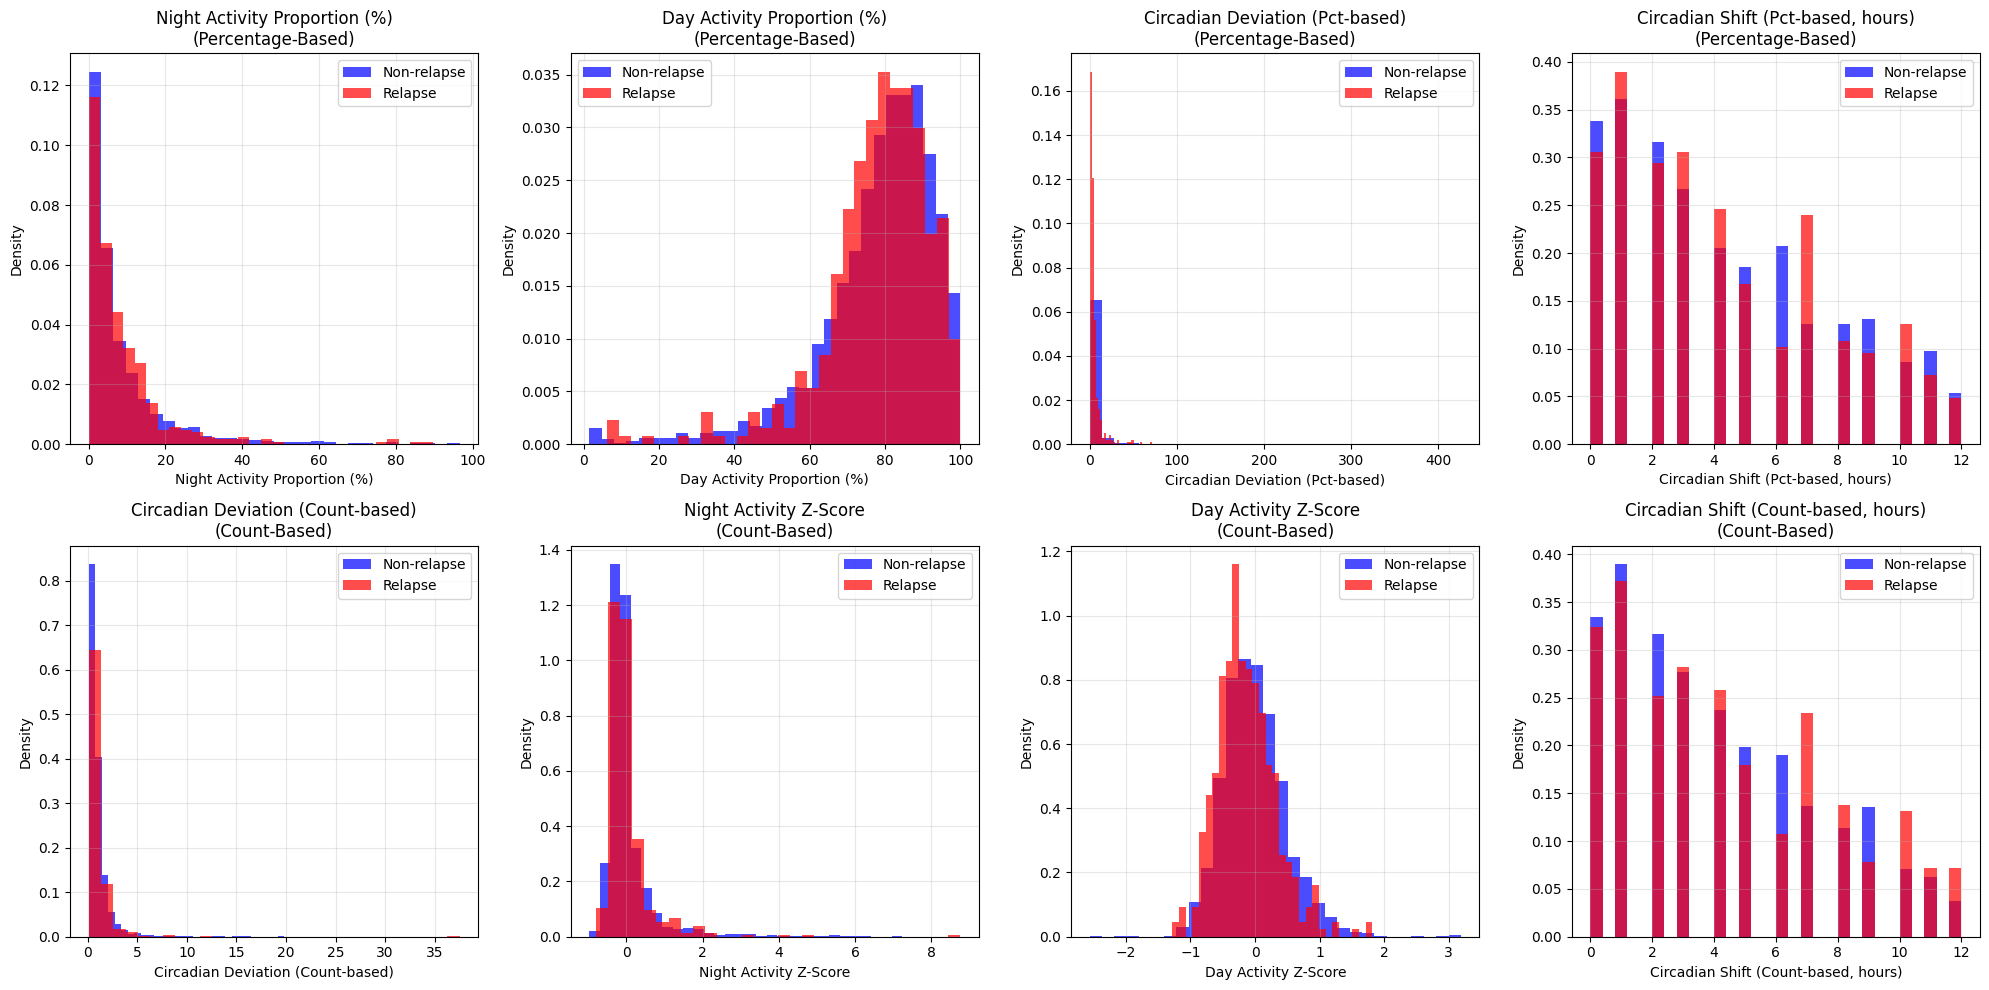


RECOMMENDATIONS

Top 3 Most Predictive Features:
  1. day_activity_zscore (AUC=0.580) [Count-based]
  2. circadian_deviation (AUC=0.576) [Count-based]
  3. circadian_shift_pct (AUC=0.527) [Percentage-based]

Clinical Interpretation:
  - Night activity proportion: 0.503 AUC
    Measures % of daily activity at night (0-6 AM)
    Higher proportion may indicate sleep disruption before relapse
  - Day activity proportion: 0.521 AUC
    Measures % of daily activity during day (9 AM-9 PM)
    Lower proportion may indicate daytime lethargy/withdrawal

Recommendation for Final Models:
  ✓ Use COUNT-BASED features (better predictive power)
    Recommended features: day_activity_zscore, circadian_deviation

  Note: Consider using BOTH types for complementary information


In [29]:
# =============================================================================
# ANALYZE CIRCADIAN FEATURES AND TEST PREDICTIVE POWER
# =============================================================================

print("=" * 70)
print("CIRCADIAN FEATURES: Analysis and Predictive Power")
print("=" * 70)

if len(circadian_features_df) > 0:
    # Define feature groups
    pct_features = ['night_activity_proportion', 'day_activity_proportion', 
                    'circadian_deviation_pct', 'circadian_shift_pct']
    count_features = ['circadian_deviation', 'night_activity_zscore', 
                      'day_activity_zscore', 'circadian_shift']
    
    # =========================================================================
    # SECTION 1: Within-Patient Comparison (Relapse vs Non-Relapse)
    # =========================================================================
    print("\nWithin-Patient Comparison (Relapse vs Non-Relapse):")
    print("=" * 70)
    
    print("\nPERCENTAGE-BASED FEATURES:")
    print("-" * 70)
    for feature in pct_features:
        if feature in circadian_features_df.columns:
            relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 1][feature].dropna()
            non_relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 0][feature].dropna()
            
            if len(relapse_vals) > 0 and len(non_relapse_vals) > 0:
                diff = relapse_vals.mean() - non_relapse_vals.mean()
                print(f"  {feature}:")
                print(f"    Non-relapse mean: {non_relapse_vals.mean():.3f}")
                print(f"    Relapse mean:     {relapse_vals.mean():.3f}")
                print(f"    Difference:       {diff:+.3f}")
                print()
    
    print("\nCOUNT-BASED FEATURES (for comparison):")
    print("-" * 70)
    for feature in count_features:
        if feature in circadian_features_df.columns:
            relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 1][feature].dropna()
            non_relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 0][feature].dropna()
            
            if len(relapse_vals) > 0 and len(non_relapse_vals) > 0:
                diff = relapse_vals.mean() - non_relapse_vals.mean()
                print(f"  {feature}:")
                print(f"    Non-relapse mean: {non_relapse_vals.mean():.3f}")
                print(f"    Relapse mean:     {relapse_vals.mean():.3f}")
                print(f"    Difference:       {diff:+.3f}")
                print()
    
    # =========================================================================
    # SECTION 2: Single Feature Predictive Power (AUC)
    # =========================================================================
    print("\n" + "=" * 70)
    print("SINGLE FEATURE PREDICTIVE POWER (AUC on test data)")
    print("=" * 70)
    
    test_circ = circadian_features_df[circadian_features_df['split_type'] == 'test']
    
    pct_aucs = {}
    count_aucs = {}
    
    print("\nPERCENTAGE-BASED FEATURES:")
    print("-" * 70)
    for feature in pct_features:
        if feature in test_circ.columns:
            valid = test_circ[[feature, 'relapse']].dropna()
            if len(valid) > 10 and valid['relapse'].sum() > 0:
                auc = roc_auc_score(valid['relapse'], valid[feature])
                auc_inv = roc_auc_score(valid['relapse'], -valid[feature])
                best_auc = max(auc, auc_inv)
                direction = "higher=relapse" if auc > auc_inv else "lower=relapse"
                pct_aucs[feature] = best_auc
                print(f"  {feature}: AUC={best_auc:.3f} ({direction})")
    
    print("\nCOUNT-BASED FEATURES:")
    print("-" * 70)
    for feature in count_features:
        if feature in test_circ.columns:
            valid = test_circ[[feature, 'relapse']].dropna()
            if len(valid) > 10 and valid['relapse'].sum() > 0:
                auc = roc_auc_score(valid['relapse'], valid[feature])
                auc_inv = roc_auc_score(valid['relapse'], -valid[feature])
                best_auc = max(auc, auc_inv)
                direction = "higher=relapse" if auc > auc_inv else "lower=relapse"
                count_aucs[feature] = best_auc
                print(f"  {feature}: AUC={best_auc:.3f} ({direction})")
    
    # =========================================================================
    # SECTION 3: Comparison Summary
    # =========================================================================
    print("\n" + "=" * 70)
    print("COMPARISON SUMMARY")
    print("=" * 70)
    
    if pct_aucs and count_aucs:
        best_pct_feature = max(pct_aucs.items(), key=lambda x: x[1])
        best_count_feature = max(count_aucs.items(), key=lambda x: x[1])
        avg_pct_auc = sum(pct_aucs.values()) / len(pct_aucs)
        avg_count_auc = sum(count_aucs.values()) / len(count_aucs)
        
        print(f"\nBest Percentage-Based Feature:")
        print(f"  {best_pct_feature[0]}: AUC={best_pct_feature[1]:.3f}")
        print(f"\nBest Count-Based Feature:")
        print(f"  {best_count_feature[0]}: AUC={best_count_feature[1]:.3f}")
        print(f"\nAverage AUC:")
        print(f"  Percentage-based: {avg_pct_auc:.3f}")
        print(f"  Count-based:      {avg_count_auc:.3f}")
        
        if avg_pct_auc > avg_count_auc:
            improvement = ((avg_pct_auc - avg_count_auc) / avg_count_auc) * 100
            print(f"\n✓ Percentage-based features perform {improvement:.1f}% better on average")
        elif avg_count_auc > avg_pct_auc:
            improvement = ((avg_count_auc - avg_pct_auc) / avg_pct_auc) * 100
            print(f"\n✓ Count-based features perform {improvement:.1f}% better on average")
        else:
            print(f"\n= Both approaches perform similarly")
    
    # =========================================================================
    # SECTION 4: Visualizations
    # =========================================================================
    print("\n" + "=" * 70)
    print("VISUALIZING CIRCADIAN PATTERNS")
    print("=" * 70)
    
    # Create 2x4 grid: top row = percentage-based, bottom row = count-based
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # Top row: Percentage-based features
    pct_plot_configs = [
        ('night_activity_proportion', 'Night Activity Proportion (%)', axes[0, 0]),
        ('day_activity_proportion', 'Day Activity Proportion (%)', axes[0, 1]),
        ('circadian_deviation_pct', 'Circadian Deviation (Pct-based)', axes[0, 2]),
        ('circadian_shift_pct', 'Circadian Shift (Pct-based, hours)', axes[0, 3])
    ]
    
    for feature, title, ax in pct_plot_configs:
        if feature in circadian_features_df.columns:
            circadian_features_df[circadian_features_df['relapse'] == 0][feature].hist(
                ax=ax, bins=30, alpha=0.7, label='Non-relapse', color='blue', density=True)
            circadian_features_df[circadian_features_df['relapse'] == 1][feature].hist(
                ax=ax, bins=30, alpha=0.7, label='Relapse', color='red', density=True)
            ax.set_xlabel(title)
            ax.set_ylabel('Density')
            ax.set_title(f'{title}\n(Percentage-Based)')
            ax.legend()
            ax.grid(alpha=0.3)
    
    # Bottom row: Count-based features
    count_plot_configs = [
        ('circadian_deviation', 'Circadian Deviation (Count-based)', axes[1, 0]),
        ('night_activity_zscore', 'Night Activity Z-Score', axes[1, 1]),
        ('day_activity_zscore', 'Day Activity Z-Score', axes[1, 2]),
        ('circadian_shift', 'Circadian Shift (Count-based, hours)', axes[1, 3])
    ]
    
    for feature, title, ax in count_plot_configs:
        if feature in circadian_features_df.columns:
            circadian_features_df[circadian_features_df['relapse'] == 0][feature].hist(
                ax=ax, bins=30, alpha=0.7, label='Non-relapse', color='blue', density=True)
            circadian_features_df[circadian_features_df['relapse'] == 1][feature].hist(
                ax=ax, bins=30, alpha=0.7, label='Relapse', color='red', density=True)
            ax.set_xlabel(title)
            ax.set_ylabel('Density')
            ax.set_title(f'{title}\n(Count-Based)')
            ax.legend()
            ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # =========================================================================
    # SECTION 5: Recommendations
    # =========================================================================
    print("\n" + "=" * 70)
    print("RECOMMENDATIONS")
    print("=" * 70)
    
    if pct_aucs and count_aucs:
        # Find top 3 features overall
        all_aucs = {**pct_aucs, **count_aucs}
        top_features = sorted(all_aucs.items(), key=lambda x: x[1], reverse=True)[:3]
        
        print("\nTop 3 Most Predictive Features:")
        for i, (feat, auc) in enumerate(top_features, 1):
            feat_type = "Percentage-based" if feat in pct_features else "Count-based"
            print(f"  {i}. {feat} (AUC={auc:.3f}) [{feat_type}]")
        
        print("\nClinical Interpretation:")
        if 'night_activity_proportion' in pct_aucs:
            print(f"  - Night activity proportion: {pct_aucs['night_activity_proportion']:.3f} AUC")
            print(f"    Measures % of daily activity at night (0-6 AM)")
            print(f"    Higher proportion may indicate sleep disruption before relapse")
        
        if 'day_activity_proportion' in pct_aucs:
            print(f"  - Day activity proportion: {pct_aucs['day_activity_proportion']:.3f} AUC")
            print(f"    Measures % of daily activity during day (9 AM-9 PM)")
            print(f"    Lower proportion may indicate daytime lethargy/withdrawal")
        
        print("\nRecommendation for Final Models:")
        if avg_pct_auc > avg_count_auc:
            print("  ✓ Use PERCENTAGE-BASED features (more predictive and interpretable)")
            print(f"    Recommended features: {', '.join([f for f, _ in sorted(pct_aucs.items(), key=lambda x: x[1], reverse=True)[:2]])}")
        else:
            print("  ✓ Use COUNT-BASED features (better predictive power)")
            print(f"    Recommended features: {', '.join([f for f, _ in sorted(count_aucs.items(), key=lambda x: x[1], reverse=True)[:2]])}")
        
        print("\n  Note: Consider using BOTH types for complementary information")
    
else:
    print("\nNo circadian features available")
    print("Run the circadian feature engineering cell first to generate features.")


Things to explore

A few ways to make circadian features more informative:
Personal baselines by day‑of‑week: Circadian patterns differ on weekends vs weekdays; baseline per weekday can sharpen deviations.
Use phase markers: Compute sleep midpoint, activity onset/offset, or acrophase (peak time) using cosine fit per day. Those tend to be more sensitive to rhythm shifts than raw hourly means.
Entropy/regularity: Add intradaily variability (IV) and interdaily stability (IS) (actigraphy staples) — they capture fragmentation and day‑to‑day rhythm strength.
Lagged change features: Differences vs last 3–7 day rolling baseline (not just overall baseline) often catch prodromal shifts.
Patient‑specific normalization: Z‑score per patient and then aggregate, rather than pooling raw values.
Label leakage check: Make sure circadian features aren’t computed using test/val info in any baseline (use train‑only baseline per patient).
If you want, I can implement any of these and add caching like before.

In [36]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION - CIRCADIAN RHYTHM FEATURES ONLY
# =============================================================================
# Uses only circadian activity pattern features from circadian_features_df (cell 29).

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

# -----------------------------------------------------------------------------
# Define circadian feature columns (numeric only; exclude IDs and label)
# -----------------------------------------------------------------------------
circadian_feature_candidates = [
    'night_activity_proportion', 'day_activity_proportion',
    'circadian_deviation_pct', 'circadian_shift_pct',
    'circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift'
]
circadian_feature_cols = [c for c in circadian_feature_candidates if c in circadian_features_df.columns]

train_data = circadian_features_df[circadian_features_df['split_type'] == 'val'].copy()
test_data = circadian_features_df[circadian_features_df['split_type'] == 'test'].copy()

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")
print("Data split:")
print(f"  Training (val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

X_train = train_data[circadian_feature_cols].copy().fillna(0)
y_train = train_data['relapse'].copy().fillna(0).astype(int)

X_test = test_data[circadian_feature_cols].copy().fillna(0)
y_test = test_data['relapse'].copy().fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# Train XGBoost Model
# -----------------------------------------------------------------------------
n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model (circadian features only)...")
model.fit(X_train, y_train)
print("Training complete!")

# -----------------------------------------------------------------------------
# Evaluate Model
# -----------------------------------------------------------------------------
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS (CIRCADIAN ONLY)")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print("                 Predicted")
print("                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (val): 588 days
  Test: 570 days

Feature matrix shapes:
  X_train: (588, 8)
  X_test: (570, 8)

Training XGBoost model (circadian features only)...
Training complete!

MODEL EVALUATION RESULTS (CIRCADIAN ONLY)

ROC-AUC: 0.5170  (random baseline: 0.5)
PR-AUC:  0.4264  (random baseline: 0.4211)
PR-AUC improvement over random: 1.3%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.58      0.57      0.57       330
     Relapse       0.42      0.43      0.43       240

    accuracy                           0.51       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.51      0.51      0.51       570


Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     187       143
Actual Relapse        136       104


In [30]:
# =============================================================================
# COMBINED MODEL: All features (sleep + steps + HRV + demographics + circadian)
# =============================================================================

import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix
)

print("=" * 70)
print("COMBINED MODEL: All features + circadian")
print("=" * 70)

# -----------------------------------------------------------------------------
# 1. Build combined dataset
# -----------------------------------------------------------------------------

combined_all_circadian = sleep_features_df.copy()
print(f"\n1. Starting with sleep_features_df: {combined_all_circadian.shape}")

combined_all_circadian = combined_all_circadian.merge(
    step_features_df,
    on=['patient_id', 'day_index', 'split'],
    how='left',
    suffixes=('', '_step')
)
print(f"2. After merging step features: {combined_all_circadian.shape}")

hrv_sv_cols = ['patient_id', 'day_index', 'split', 'rmssd', 'sdnn', 'mean_hr',
               'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']
hrv_sv_cols = [c for c in hrv_sv_cols if c in hrv_sleep_verified_df.columns]
combined_all_circadian = combined_all_circadian.merge(
    hrv_sleep_verified_df[hrv_sv_cols],
    on=['patient_id', 'day_index', 'split'],
    how='left',
    suffixes=('', '_hrv')
)
print(f"3. After merging HRV features: {combined_all_circadian.shape}")

circadian_cols = [
    'night_activity_proportion', 'day_activity_proportion',
    'circadian_deviation_pct', 'circadian_shift_pct',
    'circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift'
]
circadian_cols = [c for c in circadian_cols if c in circadian_features_df.columns]
if circadian_cols:
    circ_df = circadian_features_df[['patient_id', 'day_index', 'split'] + circadian_cols]
    combined_all_circadian = combined_all_circadian.merge(
        circ_df,
        on=['patient_id', 'day_index', 'split'],
        how='left'
    )
print(f"4. After merging circadian features: {combined_all_circadian.shape}")

if 'demo_encoded' in globals() and 'demographic_feature_cols' in globals():
    combined_all_circadian = combined_all_circadian.merge(
        demo_encoded[['patient_id'] + demographic_feature_cols],
        on='patient_id',
        how='left'
    )
    print(f"5. After merging demographics: {combined_all_circadian.shape}")
else:
    print("5. Skipping demographics (demo_encoded / demographic_feature_cols not defined)")

# -----------------------------------------------------------------------------
# 2. Define feature columns
# -----------------------------------------------------------------------------

all_numeric = combined_all_circadian.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [
    c for c in all_numeric
    if c not in {'relapse', 'day_index'} and not c.endswith('_index')
]
# Optional: keep only features with >50% non-null
feature_cols = [
    c for c in feature_cols
    if combined_all_circadian[c].notna().mean() > 0.5
]
print(f"\nFeature count: {len(feature_cols)}")
print(f"Features: {feature_cols[:10]}{'...' if len(feature_cols) > 10 else ''}")

# -----------------------------------------------------------------------------
# 3. Train/test split
# -----------------------------------------------------------------------------

train_data = combined_all_circadian[combined_all_circadian['split_type'] == 'val'].copy()
test_data = combined_all_circadian[combined_all_circadian['split_type'] == 'test'].copy()

print("\nNOTE: Using only VAL splits for training (train splits have 0% relapses)")
print("Data split:")
print(f"  Training (val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

X_train = train_data[feature_cols].copy().fillna(0)
y_train = train_data['relapse'].copy().fillna(0).astype(int)
X_test = test_data[feature_cols].copy().fillna(0)
y_test = test_data['relapse'].copy().fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# 4. Train XGBoost and evaluate
# -----------------------------------------------------------------------------

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

model = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost (all features + circadian)...")
model.fit(X_train, y_train)
print("Training complete!")

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS (ALL FEATURES + CIRCADIAN)")
print("=" * 70)
print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print("                 Predicted")
print("                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

COMBINED MODEL: All features + circadian

1. Starting with sleep_features_df: (3337, 22)
2. After merging step features: (3337, 32)
3. After merging HRV features: (3337, 38)
4. After merging circadian features: (3337, 46)
5. After merging demographics: (3337, 64)

Feature count: 52
Features: ['main_sleep_hours', 'main_sleep_onset', 'main_sleep_wake', 'total_sleep_hours', 'num_naps', 'nap_hours', 'num_sleep_episodes', 'main_sleep_hours_diff', 'total_sleep_hours_diff', 'num_naps_diff']...

NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (val): 797 days
  Test: 827 days

Feature matrix shapes:
  X_train: (797, 52)
  X_test: (827, 52)

Training XGBoost (all features + circadian)...
Training complete!

MODEL EVALUATION RESULTS (ALL FEATURES + CIRCADIAN)

ROC-AUC: 0.9982  (random baseline: 0.5)
PR-AUC:  0.9972  (random baseline: 0.4208)
PR-AUC improvement over random: 137.0%

Classification Report:
              precision    recall  f1-score   

GOOD TO HERE BUT NEED TO INVESTIGATE HIGH AUC ABOVE

MLP: All features (same data as combined XGBoost model)

Features: 52 (same as combined model)
Training samples: 797
Test samples: 827

Training MLP (64, 32)... 

/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Done.


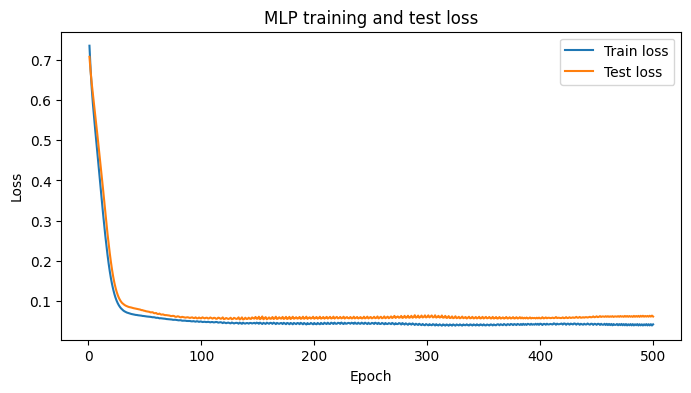


MLP EVALUATION RESULTS (ALL FEATURES)

ROC-AUC: 0.9977  (random baseline: 0.5)
PR-AUC:  0.9969  (random baseline: 0.4208)
PR-AUC improvement over random: 136.9%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.98      0.98      0.98       479
     Relapse       0.97      0.97      0.97       348

    accuracy                           0.97       827
   macro avg       0.97      0.97      0.97       827
weighted avg       0.97      0.97      0.97       827

Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     469        10
Actual Relapse         12       336


In [31]:
# =============================================================================
# MLP using all features from combined model (cell 33)
# =============================================================================

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, log_loss
)
import matplotlib.pyplot as plt

print("=" * 70)
print("MLP: All features (same data as combined XGBoost model)")
print("=" * 70)

# Use same inputs as cell 33 (X_train, y_train, X_test, y_test, feature_cols)
X_train_nn = np.asarray(X_train, dtype=np.float64)
X_test_nn = np.asarray(X_test, dtype=np.float64)
y_train_nn = np.ravel(y_train)
y_test_nn = np.ravel(y_test)

print(f"\nFeatures: {len(feature_cols)} (same as combined model)")
print(f"Training samples: {len(X_train_nn)}")
print(f"Test samples: {len(X_test_nn)}")

# Standardize (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Train MLP one epoch at a time to record train and test loss per epoch
max_epochs = 500
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=1,
    random_state=42,
    warm_start=True,
    alpha=0.1
)
train_losses = []
test_losses = []
print("\nTraining MLP (64, 32)...", end=" ", flush=True)
for epoch in range(max_epochs):
    mlp.fit(X_train_scaled, y_train_nn)
    train_losses.append(mlp.loss_)
    test_losses.append(log_loss(y_test_nn, mlp.predict_proba(X_test_scaled)[:, 1]))
print("Done.")

# Loss over epochs (train and test)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP training and test loss')
plt.legend()
plt.show()

# Evaluate
y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]
y_pred = mlp.predict(X_test_scaled)

roc_auc = roc_auc_score(y_test_nn, y_pred_proba)
pr_auc = average_precision_score(y_test_nn, y_pred_proba)
baseline_pr_auc = y_test_nn.mean()

print("\n" + "=" * 70)
print("MLP EVALUATION RESULTS (ALL FEATURES)")
print("=" * 70)
print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred, target_names=['No Relapse', 'Relapse']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_nn, y_pred)
print("                 Predicted")
print("                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

GOOD TO HERE

In [32]:
# =============================================================================
# TRANSFORMER: All features, sequences of days (same data as combined model)
# =============================================================================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

print("=" * 70)
print("TRANSFORMER: All features (sequences of days)")
print("=" * 70)

# -----------------------------------------------------------------------------
# 1. Create sequences from combined_all_circadian (same data as cell 33)
# -----------------------------------------------------------------------------
# Deduplicate so one row per (patient_id, split, day_index) - avoids huge sequence count and hang
train_rows_before = len(train_data)
test_rows_before = len(test_data)
train_data = train_data.drop_duplicates(subset=['patient_id', 'split', 'day_index'], keep='first').copy()
test_data = test_data.drop_duplicates(subset=['patient_id', 'split', 'day_index'], keep='first').copy()
if len(train_data) < train_rows_before or len(test_data) < test_rows_before:
    print(f"Dropped duplicates: train {train_rows_before} -> {len(train_data)}, test {test_rows_before} -> {len(test_data)}")

def create_sequences(df, feature_cols, seq_length=7):
    """Build sliding-window sequences per (patient_id, split). Label = relapse of last day."""
    seqs, labels = [], []
    for (pid, split), group in df.groupby(['patient_id', 'split']):
        group = group.sort_values('day_index').reset_index(drop=True)
        if len(group) < seq_length:
            continue
        feats = group[feature_cols].fillna(0).values.astype(np.float32)
        rel = group['relapse'].values
        for i in range(len(group) - seq_length + 1):
            seqs.append(feats[i : i + seq_length])
            labels.append(rel[i + seq_length - 1])
    return np.stack(seqs), np.array(labels, dtype=np.int64)

SEQ_LENGTH = 7
X_train_seq, y_train_seq = create_sequences(train_data, feature_cols, SEQ_LENGTH)
X_test_seq, y_test_seq = create_sequences(test_data, feature_cols, SEQ_LENGTH)

n_features = len(feature_cols)
print(f"\nSequences: seq_length={SEQ_LENGTH}, n_features={n_features}")
print(f"Train sequences: {len(X_train_seq)}")
print(f"Test sequences: {len(X_test_seq)}")

# -----------------------------------------------------------------------------
# 2. Standardize (fit on train, apply to both)
# -----------------------------------------------------------------------------

n_train, slen, nf = X_train_seq.shape
scaler = StandardScaler()
X_train_flat = X_train_seq.reshape(-1, nf)
scaler.fit(X_train_flat)
X_train_seq = scaler.transform(X_train_flat).reshape(n_train, slen, nf).astype(np.float32)
X_test_seq = scaler.transform(X_test_seq.reshape(-1, nf)).reshape(-1, slen, nf).astype(np.float32)

# -----------------------------------------------------------------------------
# 3. PyTorch transformer model
# -----------------------------------------------------------------------------

D_MODEL = 64
NHEAD = 4
NUM_LAYERS = 2
DROPOUT = 0.2

class SeqTransformer(nn.Module):
    def __init__(self, n_features, d_model=64, nhead=4, num_layers=2, dropout=0.2):
        super().__init__()
        self.input_proj = nn.Linear(n_features, d_model)
        self.pos_embed = nn.Parameter(torch.zeros(1, 500, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=d_model * 4,
            dropout=dropout, activation='relu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: (batch, seq_len, n_features)
        x = self.input_proj(x)
        seq_len = x.size(1)
        x = x + self.pos_embed[:, :seq_len]
        x = self.transformer(x)
        x = x[:, -1]
        return self.fc(x).squeeze(-1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SeqTransformer(n_features, d_model=D_MODEL, nhead=NHEAD, num_layers=NUM_LAYERS, dropout=DROPOUT).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------------------------------------------------------
# 4. DataLoaders and training
# -----------------------------------------------------------------------------

BATCH_SIZE = 32
EPOCHS = 80

train_ds = TensorDataset(
    torch.from_numpy(X_train_seq),
    torch.from_numpy(y_train_seq).float().unsqueeze(1)
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

print("\nTraining transformer...")
model.train()
for epoch in range(EPOCHS):
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.squeeze(1).to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 5 == 0:
        print(f"  Epoch {epoch+1}/{EPOCHS} loss={total_loss/len(train_loader):.4f}")
print("Done.")

# -----------------------------------------------------------------------------
# 5. Evaluate on test sequences
# -----------------------------------------------------------------------------

model.eval()
with torch.no_grad():
    X_test_t = torch.from_numpy(X_test_seq).to(device)
    logits = model(X_test_t).cpu().numpy()

y_pred_proba = 1 / (1 + np.exp(-logits))
y_pred = (y_pred_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test_seq, y_pred_proba)
pr_auc = average_precision_score(y_test_seq, y_pred_proba)
baseline_pr = y_test_seq.mean()

print("\n" + "=" * 70)
print("TRANSFORMER EVALUATION RESULTS (ALL FEATURES)")
print("=" * 70)
print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr - 1) * 100:.1f}%")
print("\nClassification Report:")
print(classification_report(y_test_seq, y_pred, target_names=['No Relapse', 'Relapse']))
print("Confusion Matrix:")
cm = confusion_matrix(y_test_seq, y_pred)
print("                 Predicted")
print("                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

TRANSFORMER: All features (sequences of days)

Sequences: seq_length=7, n_features=52
Train sequences: 689
Test sequences: 713

Training transformer...
  Epoch 5/80 loss=0.0040
  Epoch 10/80 loss=0.0014
  Epoch 15/80 loss=0.0008
  Epoch 20/80 loss=0.0005
  Epoch 25/80 loss=0.0004
  Epoch 30/80 loss=0.0003
  Epoch 35/80 loss=0.0002
  Epoch 40/80 loss=0.0002
  Epoch 45/80 loss=0.0001
  Epoch 50/80 loss=0.0001
  Epoch 55/80 loss=0.0001
  Epoch 60/80 loss=0.0001
  Epoch 65/80 loss=0.0001
  Epoch 70/80 loss=0.0001
  Epoch 75/80 loss=0.0001
  Epoch 80/80 loss=0.0000
Done.

TRANSFORMER EVALUATION RESULTS (ALL FEATURES)

ROC-AUC: 0.9983  (random baseline: 0.5)
PR-AUC:  0.9978  (random baseline: 0.4292)
PR-AUC improvement over random: 132.5%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.99      0.97      0.98       407
     Relapse       0.96      0.98      0.97       306

    accuracy                           0.97       713
   macro avg   

In [35]:
# =============================================================================
# LOPO HYPERPARAMETER TUNING FOR TRANSFORMER
# Leave-one-patient-out CV with grid search over transformer hyperparameters.
# Requires: combined_all_circadian, feature_cols (from cell 33).
# =============================================================================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, average_precision_score

def create_sequences(df, feature_cols, seq_length=7):
    """Build sliding-window sequences per (patient_id, split). Label = relapse of last day."""
    seqs, labels = [], []
    for (pid, split), group in df.groupby(['patient_id', 'split']):
        group = group.sort_values('day_index').reset_index(drop=True)
        if len(group) < seq_length:
            continue
        feats = group[feature_cols].fillna(0).values.astype(np.float32)
        rel = group['relapse'].values
        for i in range(len(group) - seq_length + 1):
            seqs.append(feats[i : i + seq_length])
            labels.append(rel[i + seq_length - 1])
    if not seqs:
        return np.zeros((0, seq_length, len(feature_cols)), dtype=np.float32), np.array([], dtype=np.int64)
    return np.stack(seqs), np.array(labels, dtype=np.int64)

class SeqTransformer(nn.Module):
    def __init__(self, n_features, d_model=64, nhead=4, num_layers=2, dropout=0.2):
        super().__init__()
        self.input_proj = nn.Linear(n_features, d_model)
        self.pos_embed = nn.Parameter(torch.zeros(1, 500, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=d_model * 4,
            dropout=dropout, activation='relu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_proj(x)
        seq_len = x.size(1)
        x = x + self.pos_embed[:, :seq_len]
        x = self.transformer(x)
        x = x[:, -1]
        return self.fc(x).squeeze(-1)

# -----------------------------------------------------------------------------
# Data prep
# -----------------------------------------------------------------------------
df_full = combined_all_circadian.copy()
patients = sorted(df_full['patient_id'].unique())
n_features = len(feature_cols)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("=" * 70)
print("LOPO HYPERPARAMETER TUNING FOR TRANSFORMER")
print("=" * 70)
print(f"\nPatients: {patients} (n={len(patients)})")
print(f"Features: {n_features}")


def run_one_lopo_fold(test_patient, df, feature_cols, config, seed=42):
    """
    Train transformer on all patients except test_patient (val only), evaluate on test_patient (test only).
    Returns (auroc, auprc) or (np.nan, np.nan) if fold has no valid sequences.
    """
    torch.manual_seed(seed)
    np.random.seed(seed)
    train_df = df[(df['patient_id'] != test_patient) & (df['split_type'] == 'val')].drop_duplicates(
        subset=['patient_id', 'split', 'day_index'], keep='first'
    ).copy()
    test_df = df[(df['patient_id'] == test_patient) & (df['split_type'] == 'test')].drop_duplicates(
        subset=['patient_id', 'split', 'day_index'], keep='first'
    ).copy()
    seq_len = config['seq_length']
    X_train, y_train = create_sequences(train_df, feature_cols, seq_len)
    X_test, y_test = create_sequences(test_df, feature_cols, seq_len)
    if len(X_train) == 0 or len(X_test) == 0:
        return np.nan, np.nan
    nf = len(feature_cols)
    scaler = StandardScaler()
    scaler.fit(X_train.reshape(-1, nf))
    X_train = scaler.transform(X_train.reshape(-1, nf)).reshape(X_train.shape).astype(np.float32)
    X_test = scaler.transform(X_test.reshape(-1, nf)).reshape(X_test.shape).astype(np.float32)
    model = SeqTransformer(
        nf, d_model=config['d_model'], nhead=config['nhead'],
        num_layers=config['num_layers'], dropout=config['dropout']
    ).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'])
    train_ds = TensorDataset(
        torch.from_numpy(X_train),
        torch.from_numpy(y_train).float().unsqueeze(1)
    )
    loader = DataLoader(train_ds, batch_size=config['batch_size'], shuffle=True, num_workers=0)
    model.train()
    for _ in range(config['epochs']):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.squeeze(1).to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
    model.eval()
    with torch.no_grad():
        logits = model(torch.from_numpy(X_test).to(device)).cpu().numpy()
    proba = 1 / (1 + np.exp(-logits))
    auroc = roc_auc_score(y_test, proba) if len(np.unique(y_test)) > 1 else np.nan
    auprc = average_precision_score(y_test, proba)
    return auroc, auprc


# -----------------------------------------------------------------------------
# Hyperparameter grid (nhead must divide d_model)
# -----------------------------------------------------------------------------
param_grid = {
    'seq_length': [5, 7],
    'd_model': [32, 64],
    'num_layers': [1, 2],
    'dropout': [0.2, 0.3],
    'lr': [1e-3, 2e-3],
    'batch_size': [32],
    'epochs': [40],
}
# Build configs with valid nhead (d_model % nhead == 0)
configs = []
for p in ParameterGrid(param_grid):
    p['nhead'] = 2 if p['d_model'] == 32 else 4
    configs.append(p.copy())
print(f"\nHyperparameter configs: {len(configs)}")
print("-" * 70)

# -----------------------------------------------------------------------------
# Run LOPO for each config; select best by mean AUROC
# -----------------------------------------------------------------------------
results = []
for idx, config in enumerate(configs):
    fold_aurocs, fold_auprcs = [], []
    for test_patient in patients:
        auroc, auprc = run_one_lopo_fold(test_patient, df_full, feature_cols, config)
        if not np.isnan(auroc):
            fold_aurocs.append(auroc)
        fold_auprcs.append(auprc)
    mean_auroc = np.nanmean(fold_aurocs) if fold_aurocs else np.nan
    mean_auprc = np.nanmean(fold_auprcs) if fold_auprcs else np.nan
    std_auroc = np.nanstd(fold_aurocs) if len(fold_aurocs) > 1 else 0.0
    results.append({
        'config': config,
        'mean_auroc': mean_auroc,
        'std_auroc': std_auroc,
        'mean_auprc': mean_auprc,
        'fold_aurocs': fold_aurocs,
        'fold_auprcs': fold_auprcs,
    })
    print(f"  Config {idx+1}/{len(configs)}: seq_len={config['seq_length']} d_model={config['d_model']} "
          f"layers={config['num_layers']} -> mean AUROC={mean_auroc:.4f} (+/- {std_auroc:.4f})  mean AUPRC={mean_auprc:.4f}")

best = max(results, key=lambda r: r['mean_auroc'] if not np.isnan(r['mean_auroc']) else -1)
best_config = best['config']
print("\n" + "=" * 70)
print("BEST CONFIG (by mean AUROC across LOPO folds)")
print("=" * 70)
print(f"  seq_length={best_config['seq_length']}, d_model={best_config['d_model']}, "
      f"nhead={best_config['nhead']}, num_layers={best_config['num_layers']}, "
      f"dropout={best_config['dropout']}, lr={best_config['lr']}, epochs={best_config['epochs']}")
print(f"  Mean AUROC: {best['mean_auroc']:.4f} (+/- {best['std_auroc']:.4f})")
print(f"  Mean AUPRC: {best['mean_auprc']:.4f}")
print("\nPer-fold AUROC:", [f"{x:.4f}" for x in best['fold_aurocs']])
print("Per-fold AUPRC:", [f"{x:.4f}" for x in best['fold_auprcs']])

# Optional: table of all configs and scores
import pandas as pd
results_table = pd.DataFrame([
    {
        'seq_length': r['config']['seq_length'],
        'd_model': r['config']['d_model'],
        'num_layers': r['config']['num_layers'],
        'dropout': r['config']['dropout'],
        'lr': r['config']['lr'],
        'mean_auroc': r['mean_auroc'],
        'std_auroc': r['std_auroc'],
        'mean_auprc': r['mean_auprc'],
    }
    for r in results
])
print("\nAll configs (sorted by mean AUROC):")
display(results_table.sort_values('mean_auroc', ascending=False).reset_index(drop=True))

LOPO HYPERPARAMETER TUNING FOR TRANSFORMER

Patients: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'] (n=9)
Features: 52

Hyperparameter configs: 32
----------------------------------------------------------------------
  Config 1/32: seq_len=5 d_model=32 layers=1 -> mean AUROC=0.9995 (+/- 0.0014)  mean AUPRC=0.9993
  Config 2/32: seq_len=7 d_model=32 layers=1 -> mean AUROC=0.9974 (+/- 0.0049)  mean AUPRC=0.9971
  Config 3/32: seq_len=5 d_model=32 layers=2 -> mean AUROC=0.9992 (+/- 0.0010)  mean AUPRC=0.9990
  Config 4/32: seq_len=7 d_model=32 layers=2 -> mean AUROC=0.9964 (+/- 0.0082)  mean AUPRC=0.9963
  Config 5/32: seq_len=5 d_model=32 layers=1 -> mean AUROC=0.9994 (+/- 0.0007)  mean AUPRC=0.9993
  Config 6/32: seq_len=7 d_model=32 layers=1 -> mean AUROC=0.9983 (+/- 0.0026)  mean AUPRC=0.9984
  Config 7/32: seq_len=5 d_model=32 layers=2 -> mean AUROC=0.9993 (+/- 0.0012)  mean AUPRC=0.9990
  Config 8/32: seq_len=7 d_model=32 layers=2 -> mean AUROC=0.9968 (+/- 0.0042)  mean AU

,seq_length,d_model,num_layers,dropout,lr,mean_auroc,std_auroc,mean_auprc
0,5,32,2,0.3,0.002,0.999918,0.000153,0.999913
1,5,32,1,0.3,0.002,0.999839,0.000302,0.999844
2,5,64,2,0.3,0.002,0.999663,0.000954,0.999690
3,5,64,1,0.3,0.001,0.999616,0.000872,0.999531
4,5,32,1,0.2,0.001,0.999478,0.001363,0.999301
5,5,32,1,0.2,0.002,0.999432,0.000691,0.999320
6,5,64,1,0.3,0.002,0.999363,0.001802,0.999421
7,5,32,2,0.2,0.002,0.999277,0.001173,0.998995
8,5,64,2,0.2,0.001,0.999213,0.001777,0.998929
9,5,32,2,0.2,0.001,0.999152,0.000999,0.998991


The Transformer is being fed 5 features (per day):
steps_zscore_inv - Inverted step count z-score (fewer steps than patient's baseline = higher value = higher risk)
num_sleep_episodes_zscore - Sleep fragmentation z-score (more sleep episodes than baseline = higher value = higher risk)
rmssd_zscore_sv - RMSSD (HRV metric) z-score during verified sleep periods
sdnn_zscore_sv - SDNN (HRV metric) z-score during verified sleep periods
mean_hr_zscore_sv - Mean heart rate z-score during verified sleep periods

1. steps_zscore_inv (Daily Step Count Deviation)
What it measures: How much the patient walked compared to their normal amount.
How it's calculated:
Count total steps each day from step.parquet
Calculate patient's average steps on non-relapse days (their baseline)
For each day: (baseline_steps - today's_steps) / baseline_std
Inverted so that fewer steps = higher value
Interpretation: Higher value = walked less than usual = higher relapse risk
2. num_sleep_episodes_zscore (Sleep Fragmentation)
What it measures: How fragmented/interrupted the patient's sleep was.
How it's calculated:
Count number of sleep episodes per day from sleep.parquet
Calculate patient's average episodes on non-relapse days (baseline)
For each day: (today's_episodes - baseline_episodes) / baseline_std
Interpretation: Higher value = more sleep interruptions than usual = higher relapse risk
3. rmssd_zscore_sv (Heart Rate Variability - RMSSD)
What it measures: Beat-to-beat heart rate variability during sleep.
How it's calculated:
Filter HRV data (hrm.parquet) to only times within sleep episodes
Calculate RMSSD: square root of mean squared successive RR interval differences
Compare to patient's baseline RMSSD from non-relapse nights
Z-score: (today's_rmssd - baseline_rmssd) / baseline_std
Interpretation: Changes in RMSSD from baseline may indicate autonomic nervous system changes
4. sdnn_zscore_sv (Heart Rate Variability - SDNN)
What it measures: Overall heart rate variability during sleep.
How it's calculated:
Filter HRV data to only times within sleep episodes
Calculate SDNN: standard deviation of all RR intervals
Compare to patient's baseline SDNN
Z-score: (today's_sdnn - baseline_sdnn) / baseline_std
Interpretation: Changes in SDNN from baseline may indicate stress or autonomic changes
5. mean_hr_zscore_sv (Mean Heart Rate During Sleep)
What it measures: Average heart rate while sleeping.
How it's calculated:
Filter HRV data to only times within sleep episodes
Calculate mean heart rate for that night
Compare to patient's baseline mean HR
Z-score: (today's_hr - baseline_hr) / baseline_std
Interpretation: Higher/lower HR than usual during sleep may indicate physiological changes
Key Concepts
Z-score: Measures how many standard deviations away from the patient's own baseline
Sleep-verified (_sv): HRV filtered to actual sleep periods using sleep.parquet, not just nighttime hours
Patient-specific baseline: Each patient compared to themselves, not to other patients